<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html lectures.do.txt --no_mako -->
<!-- dom:TITLE: Computational Physics  Lectures: Ten algorithms for quantum mechanical systems -->

# Computational Physics  Lectures: Ten algorithms for quantum mechanical systems
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams, East Lansing, Michigan State University, USA

Date: **Oct 11, 2022**

Copyright 1999-2022, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license

## Overview
In this contribution we outline central algorithms for studying
quantum mechanical systems, with an emphasis on both computational and
pedagogical aspects. Using simple systems that allow for analytical
solutions, we show how one can move from linear algebra and eigenvalue
algorithms using for example full configuration interaction theory, to
stochastic methods like variational and Diffusion Monte Carlo
approaches and finally, how we can use Monte Carlo methods together
with deep learning algorithms. Along this journey we will present ten
central algorithms which have changed considerably the way we study
interacting many-particle systems.  These algorithms span from
Householder’s famous transformation of matrices, via iterative
eigenvalue solvers to neural networks and automatic differentiation
for optimizing multidimensional functions. Codes and jupyter-notebooks
are provided, allowing thereby the reader to experiment and practice
the various methods.

## Algorithms
 * Linear algebra and eigenvalue problems

a. Houselholder's transformation

b. Jacobi/Givens rotations

c. Iterative methods, Lanczsos' method

 * Monte Carlo methods

a. Variational Monte Carlo

b. Metropolis-Hastings algorithm

 * Optimization problems

a. Gradient descent and steepest gradient descent

b. Adaptive methods

 * Automatic differentiation

 * Deep learning

a. Neural Networks

b. Reduced Boltzmann machines

## Eigenvalue problems, basic definitions

Let us consider the matrix $\mathbf{A}$ of dimension $n$. The eigenvalues of
$\mathbf{A}$ are defined through the matrix equation

$$
\mathbf{A}\mathbf{x}^{(\nu)} = \lambda^{(\nu)}\mathbf{x}^{(\nu)},
$$

where $\lambda^{(\nu)}$ are the eigenvalues and $\mathbf{x}^{(\nu)}$ the
corresponding eigenvectors.
Unless otherwise stated, when we use the wording eigenvector we mean the
right eigenvector. The left eigenvalue problem is defined as

$$
\mathbf{x}^{(\nu)}_L\mathbf{A} = \lambda^{(\nu)}\mathbf{x}^{(\nu)}_L
$$

The above right eigenvector problem is equivalent to a set of $n$ equations with $n$ unknowns
$x_i$.

## Eigenvalue problems, basic definitions

The eigenvalue problem can be rewritten as

$$
\left( \mathbf{A}-\lambda^{(\nu)} \mathbf{I} \right) \mathbf{x}^{(\nu)} = 0,
$$

with $\mathbf{I}$ being the unity matrix. This equation provides
a solution to the problem if and only if the determinant
is zero, namely

$$
\left| \mathbf{A}-\lambda^{(\nu)}\mathbf{I}\right| = 0,
$$

which in turn means that the determinant is a polynomial
of degree $n$ in $\lambda$ and in general we will have 
$n$ distinct zeros. 

The eigenvalues of a matrix 
$\mathbf{A}\in {\mathbb{C}}^{n\times n}$
are thus the $n$ roots of its characteristic polynomial

$$
P(\lambda) = det(\lambda\mathbf{I}-\mathbf{A}),
$$

or

$$
P(\lambda)= \prod_{i=1}^{n}\left(\lambda_i-\lambda\right).
$$

The set of these roots is called the spectrum and is denoted as
$\lambda(\mathbf{A})$.
If $\lambda(\mathbf{A})=\left\{\lambda_1,\lambda_2,\dots ,\lambda_n\right\}$ then we have

$$
det(\mathbf{A})= \lambda_1\lambda_2\dots\lambda_n,
$$

and if we define the trace of $\mathbf{A}$ as

$$
Tr(\mathbf{A})=\sum_{i=1}^n a_{ii}
$$

then

$$
Tr(\mathbf{A})=\lambda_1+\lambda_2+\dots+\lambda_n.
$$

## Abel-Ruffini Impossibility Theorem

The *Abel-Ruffini* theorem (also known as Abel's impossibility theorem) 
states that there is no general solution in radicals to polynomial equations of degree five or higher.

The content of this theorem is frequently misunderstood. It does not assert that higher-degree polynomial equations are unsolvable. 
In fact, if the polynomial has real or complex coefficients, and we allow complex solutions, then every polynomial equation has solutions; this is the fundamental theorem of algebra. Although these solutions cannot always be computed exactly with radicals, they can be computed to any desired degree of accuracy using numerical methods such as the Newton-Raphson method or Laguerre method, and in this way they are no different from solutions to polynomial equations of the second, third, or fourth degrees.

The theorem only concerns the form that such a solution must take. The content of the theorem is 
that the solution of a higher-degree equation cannot in all cases be expressed in terms of the polynomial coefficients with a finite number of operations of addition, subtraction, multiplication, division and root extraction. Some polynomials of arbitrary degree, of which the simplest nontrivial example is the monomial equation $ax^n = b$, are always solvable with a radical.

The *Abel-Ruffini* theorem says that there are some fifth-degree equations whose solution cannot be so expressed. 
The equation $x^5 - x + 1 = 0$ is an example. Some other fifth degree equations can be solved by radicals, 
for example $x^5 - x^4 - x + 1 = 0$. The precise criterion that distinguishes between those equations that can be solved 
by radicals and those that cannot was given by Galois and is now part of Galois theory: 
a polynomial equation can be solved by radicals if and only if its Galois group is a solvable group.

Today, in the modern algebraic context, we say that second, third and fourth degree polynomial 
equations can always be solved by radicals because the symmetric groups $S_2, S_3$ and $S_4$ are solvable groups, 
whereas $S_n$ is not solvable for $n \ge 5$.

## Eigenvalue problems, basic definitions

In the present discussion we assume that our matrix is real and symmetric, that is 
$\mathbf{A}\in {\mathbb{R}}^{n\times n}$.
The matrix $\mathbf{A}$ has $n$ eigenvalues
$\lambda_1\dots \lambda_n$ (distinct or not). Let $\mathbf{D}$ be the
diagonal matrix with the eigenvalues on the diagonal

$$
\mathbf{D}=    \left( \begin{array}{ccccccc} \lambda_1 & 0 & 0   & 0    & \dots  &0     & 0 \\
                                0 & \lambda_2 & 0 & 0    & \dots  &0     &0 \\
                                0   & 0 & \lambda_3 & 0  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &\dots       &\lambda_{n-1} & \\
                                0   & \dots & \dots & \dots  &\dots       &0 & \lambda_n
             \end{array} \right).
$$

If $\mathbf{A}$ is real and symmetric then there exists a real orthogonal matrix $\mathbf{S}$ such that

$$
\mathbf{S}^T \mathbf{A}\mathbf{S}= \mathrm{diag}(\lambda_1,\lambda_2,\dots ,\lambda_n),
$$

and for $j=1:n$ we have $\mathbf{A}\mathbf{S}(:,j) = \lambda_j \mathbf{S}(:,j)$.

To obtain the eigenvalues of $\mathbf{A}\in {\mathbb{R}}^{n\times n}$,
the strategy is to
perform a series of similarity transformations on the original
matrix $\mathbf{A}$, in order to reduce it either into a  diagonal form as above
or into a  tridiagonal form. 

We say that a matrix $\mathbf{B}$ is a similarity
transform  of  $\mathbf{A}$ if

$$
\mathbf{B}= \mathbf{S}^T \mathbf{A}\mathbf{S}, \hspace{1cm} \mathrm{where} \hspace{1cm}  \mathbf{S}^T\mathbf{S}=\mathbf{S}^{-1}\mathbf{S} =\mathbf{I}.
$$

The importance of a similarity transformation lies in the fact that
the resulting matrix has the same
eigenvalues, but the eigenvectors are in general different. 

To prove this we
start with  the eigenvalue problem and a similarity transformed matrix $\mathbf{B}$.

$$
\mathbf{A}\mathbf{x}=\lambda\mathbf{x} \hspace{1cm} \mathrm{and}\hspace{1cm} 
    \mathbf{B}= \mathbf{S}^T \mathbf{A}\mathbf{S}.
$$

We multiply the first equation on the left by $\mathbf{S}^T$ and insert
$\mathbf{S}^{T}\mathbf{S} = \mathbf{I}$ between $\mathbf{A}$ and $\mathbf{x}$. Then we get

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
   (\mathbf{S}^T\mathbf{A}\mathbf{S})(\mathbf{S}^T\mathbf{x})=\lambda\mathbf{S}^T\mathbf{x} ,
\label{_auto1} \tag{1}
\end{equation}
$$

which is the same as

$$
\mathbf{B} \left ( \mathbf{S}^T\mathbf{x} \right ) = \lambda \left (\mathbf{S}^T\mathbf{x}\right ).
$$

The variable  $\lambda$ is an eigenvalue of $\mathbf{B}$ as well, but with
eigenvector $\mathbf{S}^T\mathbf{x}$.

The basic philosophy is to
 * Either apply subsequent similarity transformations (direct method) so that

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
   \mathbf{S}_N^T\dots \mathbf{S}_1^T\mathbf{A}\mathbf{S}_1\dots \mathbf{S}_N=\mathbf{D} ,
\label{_auto2} \tag{2}
\end{equation}
$$

* Or apply subsequent similarity transformations so that $\mathbf{A}$ becomes tridiagonal (Householder) or upper/lower triangular (the *QR* method to be discussed later). 

 * Thereafter, techniques for obtaining eigenvalues from tridiagonal matrices can be used.

 * Or use so-called power methods

 * Or use iterative methods (Krylov, Lanczos, Arnoldi). These methods are popular for huge matrix problems.

One speaks normally of two main approaches to solving the eigenvalue problem.
 * The first is the formal method, involving determinants and the  characteristic polynomial. This proves how many eigenvalues  there are, and is the way most of you learned about how to solve the eigenvalue problem, but for matrices of dimensions greater than 2 or 3, it is rather impractical.

 * The other general approach is to use similarity or unitary tranformations  to reduce a matrix to diagonal form. This is normally done in two steps: first reduce to for example a *tridiagonal* form, and then to diagonal form. The main algorithms we will discuss in detail, Jacobi's and  Householder's  (so-called direct method) and Lanczos algorithms (an iterative method), follow this methodology. 

Direct or non-iterative methods  require for matrices of dimensionality $n\times n$ typically $O(n^3)$ operations. These methods are normally called standard methods and are used for dimensionalities
$n \sim 10^5$ or smaller. A brief historical overview  

<table class="dotable" border="1">
<thead>
<tr><th align="center">Year</th> <th align="center">    $n$     </th> <th align="center">                 </th> </tr>
</thead>
<tbody>
<tr><td align="center">   1950    </td> <td align="center">   $n=20$          </td> <td align="center">   (Wilkinson)          </td> </tr>
<tr><td align="center">   1965    </td> <td align="center">   $n=200$         </td> <td align="center">   (Forsythe et al.)    </td> </tr>
<tr><td align="center">   1980    </td> <td align="center">   $n=2000$        </td> <td align="center">   Linpack              </td> </tr>
<tr><td align="center">   1995    </td> <td align="center">   $n=20000$       </td> <td align="center">   Lapack               </td> </tr>
<tr><td align="center">   2017    </td> <td align="center">   $n\sim 10^5$    </td> <td align="center">   Lapack               </td> </tr>
</tbody>
</table>

shows that in the course of 60 years the dimension that  direct diagonalization methods can handle  has increased by almost a factor of
$10^4$. However, it pales beside the progress achieved by computer hardware, from flops to petaflops, a factor of almost $10^{15}$. We see clearly played out in history the $O(n^3)$ bottleneck  of direct matrix algorithms.

Sloppily speaking, when  $n\sim 10^4$ is cubed we have $O(10^{12})$ operations, which is smaller than the $10^{15}$ increase in flops.  

If the matrix to diagonalize is large and sparse, direct methods simply become impractical, 
also because
many of the direct methods tend to destroy sparsity. As a result large dense matrices may arise during the diagonalization procedure.  The idea behind iterative methods is to project the 
$n-$dimensional problem in smaller spaces, so-called Krylov subspaces. 
Given a matrix $\mathbf{A}$ and a vector $\mathbf{v}$, the associated Krylov sequences of vectors
(and thereby subspaces) 
$\mathbf{v}$, $\mathbf{A}\mathbf{v}$, $\mathbf{A}^2\mathbf{v}$, $\mathbf{A}^3\mathbf{v},\dots$, represent
successively larger Krylov subspaces.

## Discussion of Jacobi's method for eigenvalues

Consider an  example of an ($n\times n$) orthogonal transformation matrix

$$
\mathbf{S}=
 \left( 
   \begin{array}{cccccccc}
   1  &    0  & \dots &   0        &    0  & \dots & 0 &   0       \\
   0  &    1  & \dots &   0        &    0  & \dots & 0 &   0       \\
\dots & \dots & \dots & \dots      & \dots & \dots & 0 & \dots     \\ 
   0  &    0  & \dots & \cos\theta  &    0  & \dots & 0 & \sin\theta \\
   0  &    0  & \dots &   0        &    1  & \dots & 0 &   0       \\
\dots & \dots & \dots & \dots      & \dots & \dots & 1 & \dots     \\
   0  &    0  & \dots &  -\sin\theta        &    0  & \dots & 0 &   \cos\theta   
   \end{array}
 \right)
$$

with property $\mathbf{S^{T}} = \mathbf{S^{-1}}$.
It performs a plane rotation around an angle $\theta$ in the Euclidean 
$n-$dimensional space. 

It means that its matrix elements that differ
from zero are given by

$$
s_{kk}= s_{ll}=\cos\theta, 
    s_{kl}=-s_{lk}= -\sin\theta, 
    s_{ii}=1\hspace{0.5cm} i\ne k \hspace{0.5cm} i \ne l,
$$

A similarity transformation

$$
\mathbf{B}= \mathbf{S}^T \mathbf{A}\mathbf{S},
$$

results in

$$
\begin{align*}
b_{ik} =& a_{ik}\cos\theta - a_{il}\sin\theta , i \ne k, i \ne l \\
b_{il} =& a_{il}\cos\theta + a_{ik}\sin\theta , i \ne k, i \ne l \nonumber\\
b_{kk} =& a_{kk}\cos^2\theta - 2a_{kl}\cos\theta \sin\theta +a_{ll}\sin^2\theta\nonumber\\
b_{ll} =& a_{ll}\cos^2\theta +2a_{kl}\cos\theta sin\theta +a_{kk}\sin^2\theta\nonumber\\
b_{kl} =& (a_{kk}-a_{ll})\cos\theta \sin\theta +a_{kl}(\cos^2\theta-\sin^2\theta)\nonumber 
\end{align*}
$$

The angle $\theta$ is  arbitrary. The recipe is to choose  $\theta$ so that all
non-diagonal matrix elements $b_{kl}$ become zero.  

The main idea is thus to reduce systematically the 
norm of the 
off-diagonal matrix elements  of a matrix  $\mathbf{A}$

$$
\mathrm{off}(\mathbf{A}) = \sqrt{\sum_{i=1}^n\sum_{j=1,j\ne i}^n a_{ij}^2}.
$$

To demonstrate the algorithm, we consider the  simple $2\times 2$  similarity transformation
of the full matrix. The matrix is symmetric, we single out $ 1 \le k < l \le n$  and 
use the abbreviations $c=\cos\theta$ and $s=\sin\theta$ to obtain

$$
\left( \begin{array}{cc} b_{kk} & 0 \\
                          0 & b_{ll} \\\end{array} \right)  =  \left( \begin{array}{cc} c & -s \\
                          s &c \\\end{array} \right)  \left( \begin{array}{cc} a_{kk} & a_{kl} \\
                          a_{lk} &a_{ll} \\\end{array} \right) \left( \begin{array}{cc} c & s \\
                          -s & c \\\end{array} \right).
$$

We require that the non-diagonal matrix elements $b_{kl}=b_{lk}=0$, implying that

$$
a_{kl}(c^2-s^2)+(a_{kk}-a_{ll})cs = b_{kl} = 0.
$$

If $a_{kl}=0$ one sees immediately that $\cos\theta = 1$ and $\sin\theta=0$.

The Frobenius norm of an orthogonal transformation is always preserved. The Frobenius norm is defined
as

$$
\mathrm{norm}(\mathbf{A})_F =  \sqrt{\sum_{i=1}^n\sum_{j=1}^n |a_{ij}|^2}.
$$

This means that for our $2\times 2$ case  we have

$$
2a_{kl}^2+a_{kk}^2+a_{ll}^2 = b_{kk}^2+b_{ll}^2,
$$

which leads to

$$
\mathrm{off}(\mathbf{B})^2 = \mathrm{norm}(\mathbf{B})_F^2-\sum_{i=1}^nb_{ii}^2=\mathrm{off}(\mathbf{A})^2-2a_{kl}^2,
$$

since

$$
\mathrm{norm}(\mathbf{B})_F^2-\sum_{i=1}^nb_{ii}^2=\mathrm{norm}(\mathbf{A})_F^2-\sum_{i=1}^na_{ii}^2+(a_{kk}^2+a_{ll}^2 -b_{kk}^2-b_{ll}^2).
$$

This results means that  the matrix $\mathbf{A}$ moves closer to diagonal form  for each transformation.

Defining the quantities $\tan\theta = t= s/c$ and

$$
\cot 2\theta=\tau = \frac{a_{ll}-a_{kk}}{2a_{kl}},
$$

we obtain the quadratic equation (using $\cot 2\theta=1/2(\cot \theta-\tan\theta)$

$$
t^2+2\tau t-1= 0,
$$

resulting in

$$
t = -\tau \pm \sqrt{1+\tau^2},
$$

and $c$ and $s$ are easily obtained via

$$
c = \frac{1}{\sqrt{1+t^2}},
$$

and $s=tc$.  Convince yourself that we have $|\theta| \le \pi/4$. This has the effect  
of minimizing the difference between the matrices $\mathbf{B}$ and $\mathbf{A}$ since

$$
\mathrm{norm}(\mathbf{B}-\mathbf{A})_F^2=4(1-c)\sum_{i=1,i\ne k,l}^n(a_{ik}^2+a_{il}^2) +\frac{2a_{kl}^2}{c^2}.
$$

* Choose a tolerance $\epsilon$, making it a small number, typically $10^{-8}$ or smaller.

 * Setup a *while* test  where one compares the norm of the newly computed off-diagonal matrix elements  \[ \mathrm{off}(\mathbf{A}) = \sqrt{\sum_{i=1}^n\sum_{j=1,j\ne i}^n a_{ij}^2}   >  \epsilon. \]

 * Now choose the matrix elements $a_{kl}$ so that we have those with largest value, that is $|a_{kl}|=\mathrm{max}_{i\ne j} |a_{ij}|$.

 * Compute thereafter $\tau = (a_{ll}-a_{kk})/2a_{kl}$, $\tan\theta$, $\cos\theta$ and $\sin\theta$.

 * Compute thereafter the similarity transformation for this set of values $(k,l)$, obtaining the new matrix $\mathbf{B}= \mathbf{S}(k,l,\theta)^T \mathbf{A}\mathbf{S}(k,l,\theta)$.

 * Compute the new norm of the off-diagonal matrix elements and continue till you have satisfied $\mathrm{off}(\mathbf{B})  \le  \epsilon$

The convergence rate of the Jacobi method is however poor, one needs typically $3n^2-5n^2$ rotations and each rotation 
requires $4n$ operations, resulting in a total of $12n^3-20n^3$ operations in order to zero out non-diagonal matrix elements.

We specialize to a symmetric $3\times 3 $ matrix $\mathbf{A}$.
We start the process as follows (assuming that $a_{23}=a_{32}$ is the largest non-diagonal)
with $c=\cos{\theta}$ and $s=\sin{\theta}$

$$
\mathbf{B} =
      \left( \begin{array}{ccc} 
                1 & 0 & 0    \\
                0 & c & -s     \\
                0 & s & c
             \end{array} \right)\left( \begin{array}{ccc} 
                a_{11} & a_{12} & a_{13}    \\
                a_{21} & a_{22} & a_{23}     \\
                a_{31} & a_{32} & a_{33}
             \end{array} \right)
              \left( \begin{array}{ccc} 
                1 & 0 & 0    \\
                0 & c & s     \\
                0 & -s & c
             \end{array} \right).
$$

We will choose the angle $\theta$ in order to have $a_{23}=a_{32}=0$.
We get (symmetric matrix)

$$
\mathbf{B} =\left( \begin{array}{ccc} 
                a_{11} & a_{12}c -a_{13}s& a_{12}s+a_{13}c    \\
                a_{12}c -a_{13}s & a_{22}c^2+a_{33}s^2 -2a_{23}sc& (a_{22}-a_{33})sc +a_{23}(c^2-s^2)     \\
                a_{12}s+a_{13}c & (a_{22}-a_{33})sc +a_{23}(c^2-s^2) & a_{22}s^2+a_{33}c^2 +2a_{23}sc
             \end{array} \right).
$$

Note that $a_{11}$ is unchanged! As it should.

We have

$$
\mathbf{B} =\left( \begin{array}{ccc} 
                a_{11} & a_{12}c -a_{13}s& a_{12}s+a_{13}c    \\
                a_{12}c -a_{13}s & a_{22}c^2+a_{33}s^2 -2a_{23}sc& (a_{22}-a_{33})sc +a_{23}(c^2-s^2)     \\
                a_{12}s+a_{13}c & (a_{22}-a_{33})sc +a_{23}(c^2-s^2) & a_{22}s^2+a_{33}c^2 +2a_{23}sc
             \end{array} \right).
$$

or

$$
\begin{align*}
b_{11} =& a_{11} \\
b_{12} =& a_{12}\cos\theta - a_{13}\sin\theta , 1 \ne 2, 1 \ne 3 \\
b_{13} =& a_{13}\cos\theta + a_{12}\sin\theta , 1 \ne 2, 1 \ne 3 \nonumber\\
b_{22} =& a_{22}\cos^2\theta - 2a_{23}\cos\theta \sin\theta +a_{33}\sin^2\theta\nonumber\\
b_{33} =& a_{33}\cos^2\theta +2a_{23}\cos\theta \sin\theta +a_{22}\sin^2\theta\nonumber\\
b_{23} =& (a_{22}-a_{33})\cos\theta \sin\theta +a_{23}(\cos^2\theta-\sin^2\theta)\nonumber 
\end{align*}
$$

We will fix the angle $\theta$ so that $b_{23}=0$.

We get then a new matrix

$$
\mathbf{B} =\left( \begin{array}{ccc} 
                b_{11} & b_{12}& b_{13}    \\
                b_{12}& b_{22}& 0    \\
                b_{13}& 0& a_{33}
             \end{array} \right).
$$

We repeat then assuming that $b_{12}$ is the largest non-diagonal matrix element and get a
new matrix

$$
\mathbf{C} =
      \left( \begin{array}{ccc} 
                c & -s & 0    \\
                s & c & 0     \\
                0 & 0 & 1
             \end{array} \right)\left( \begin{array}{ccc} 
                b_{11} & b_{12} & b_{13}    \\
                b_{12} & b_{22} & 0     \\
                b_{13} & 0 & b_{33}
             \end{array} \right)
              \left( \begin{array}{ccc} 
                c & s & 0    \\
                -s & c & 0     \\
                0 & 0 & 1
             \end{array} \right).
$$

We continue this process till all non-diagonal matrix elements are zero (ideally).
You will notice that performing the above operations that the matrix element 
$b_{23}$ which was previous zero becomes different from zero.  This is one of the problems which slows
down the jacobi procedure.

The more general expression for the new matrix elements are

$$
\begin{align*}
b_{ii} =& a_{ii}, i \ne k, i \ne l \\
b_{ik} =& a_{ik}\cos\theta - a_{il}\sin\theta , i \ne k, i \ne l \\
b_{il} =& a_{il}\cos\theta + a_{ik}\sin\theta , i \ne k, i \ne l \nonumber\\
b_{kk} =& a_{kk}\cos^2\theta - 2a_{kl}\cos\theta \sin\theta +a_{ll}\sin^2\theta\nonumber\\
b_{ll} =& a_{ll}\cos^2\theta +2a_{kl}\cos\theta \sin\theta +a_{kk}\sin^2\theta\nonumber\\
b_{kl} =& (a_{kk}-a_{ll})\cos\theta \sin\theta +a_{kl}(\cos^2\theta-\sin^2\theta)\nonumber 
\end{align*}
$$

This is what we will need to code.

## Our system

We are first interested in the solution of the radial part of Schroedinger's equation for one electron. This equation reads

$$
-\frac{\hbar^2}{2 m} \left ( \frac{1}{r^2} \frac{d}{dr} r^2
  \frac{d}{dr} - \frac{l (l + 1)}{r^2} \right )R(r) 
     + V(r) R(r) = E R(r).
$$

In our case $V(r)$ is the harmonic oscillator potential $(1/2)kr^2$ with
$k=m\omega^2$ and $E$ is
the energy of the harmonic oscillator in three dimensions.
The oscillator frequency is $\omega$ and the energies are

$$
E_{nl}=  \hbar \omega \left(2n+l+\frac{3}{2}\right),
$$

with $n=0,1,2,\dots$ and $l=0,1,2,\dots$.

Since we have made a transformation to spherical coordinates it means that 
$r\in [0,\infty)$.  
The quantum number
$l$ is the orbital momentum of the electron.   Then we substitute $R(r) = (1/r) u(r)$ and obtain

$$
-\frac{\hbar^2}{2 m} \frac{d^2}{dr^2} u(r) 
       + \left ( V(r) + \frac{l (l + 1)}{r^2}\frac{\hbar^2}{2 m}
                                    \right ) u(r)  = E u(r) .
$$

The boundary conditions are $u(0)=0$ and $u(\infty)=0$.

We introduce a dimensionless variable $\rho = (1/\alpha) r$
where $\alpha$ is a constant with dimension length and get

$$
-\frac{\hbar^2}{2 m \alpha^2} \frac{d^2}{d\rho^2} u(\rho) 
       + \left ( V(\rho) + \frac{l (l + 1)}{\rho^2}
         \frac{\hbar^2}{2 m\alpha^2} \right ) u(\rho)  = E u(\rho) .
$$

For simplicity we set  $l=0$.
Inserting $V(\rho) = (1/2) k \alpha^2\rho^2$ we end up with

$$
-\frac{\hbar^2}{2 m \alpha^2} \frac{d^2}{d\rho^2} u(\rho) 
       + \frac{k}{2} \alpha^2\rho^2u(\rho)  = E u(\rho) .
$$

We multiply thereafter with $2m\alpha^2/\hbar^2$ on both sides and obtain

$$
-\frac{d^2}{d\rho^2} u(\rho) 
       + \frac{mk}{\hbar^2} \alpha^4\rho^2u(\rho)  = \frac{2m\alpha^2}{\hbar^2}E u(\rho) .
$$

We have thus

$$
-\frac{d^2}{d\rho^2} u(\rho) 
       + \frac{mk}{\hbar^2} \alpha^4\rho^2u(\rho)  = \frac{2m\alpha^2}{\hbar^2}E u(\rho) .
$$

The constant $\alpha$ can now be fixed
so that

$$
\frac{mk}{\hbar^2} \alpha^4 = 1,
$$

or

$$
\alpha = \left(\frac{\hbar^2}{mk}\right)^{1/4}.
$$

Defining

$$
\lambda = \frac{2m\alpha^2}{\hbar^2}E,
$$

we can rewrite Schroedinger's equation as

$$
-\frac{d^2}{d\rho^2} u(\rho) + \rho^2u(\rho)  = \lambda u(\rho) .
$$

This is the first equation to solve numerically. In three dimensions 
the eigenvalues for $l=0$ are 
$\lambda_0=3,\lambda_1=7,\lambda_2=11,\dots .$

We use the by now standard
expression for the second derivative of a function $u$

<!-- Equation labels as ordinary links -->
<div id="eq:diffoperation"></div>

$$
\begin{equation}
    u''=\frac{u(\rho+h) -2u(\rho) +u(\rho-h)}{h^2} +O(h^2),
\label{eq:diffoperation} \tag{3}
\end{equation}
$$

where $h$ is our step.
Next we define minimum and maximum values for the variable $\rho$,
$\rho_{\mathrm{min}}=0$  and $\rho_{\mathrm{max}}$, respectively.
You need to check your results for the energies against different values
$\rho_{\mathrm{max}}$, since we cannot set
$\rho_{\mathrm{max}}=\infty$. 

With a given number of steps, $n_{\mathrm{step}}$, we then 
define the step $h$ as

$$
h=\frac{\rho_{\mathrm{max}}-\rho_{\mathrm{min}} }{n_{\mathrm{step}}}.
$$

Define an arbitrary value of $\rho$ as

$$
\rho_i= \rho_{\mathrm{min}} + ih \hspace{1cm} i=0,1,2,\dots , n_{\mathrm{step}}
$$

we can rewrite the Schr\"odinger equation for $\rho_i$ as

$$
-\frac{u(\rho_i+h) -2u(\rho_i) +u(\rho_i-h)}{h^2}+\rho_i^2u(\rho_i)  = \lambda u(\rho_i),
$$

or in  a more compact way

$$
-\frac{u_{i+1} -2u_i +u_{i-1}}{h^2}+\rho_i^2u_i=-\frac{u_{i+1} -2u_i +u_{i-1} }{h^2}+V_iu_i  = \lambda u_i,
$$

where $V_i=\rho_i^2$ is the harmonic oscillator potential.

Define first the diagonal matrix element

$$
d_i=\frac{2}{h^2}+V_i,
$$

and the non-diagonal matrix element

$$
e_i=-\frac{1}{h^2}.
$$

In this case the non-diagonal matrix elements are given by a mere constant. *All non-diagonal matrix elements are equal*.

With these definitions the Schroedinger equation takes the following form

$$
d_iu_i+e_{i-1}u_{i-1}+e_{i+1}u_{i+1}  = \lambda u_i,
$$

where $u_i$ is unknown. We can write the 
latter equation as a matrix eigenvalue problem

<!-- Equation labels as ordinary links -->
<div id="eq:sematrix"></div>

$$
\begin{equation}
    \left( \begin{array}{ccccccc} d_1 & e_1 & 0   & 0    & \dots  &0     & 0 \\
                                e_1 & d_2 & e_2 & 0    & \dots  &0     &0 \\
                                0   & e_2 & d_3 & e_3  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &\dots       &d_{n_{\mathrm{step}}-2} & e_{n_{\mathrm{step}}-1}\\
                                0   & \dots & \dots & \dots  &\dots       &e_{n_{\mathrm{step}}-1} & d_{n_{\mathrm{step}}-1}
             \end{array} \right)      \left( \begin{array}{c} u_{1} \\
                                                              u_{2} \\
                                                              \dots\\ \dots\\ \dots\\
                                                              u_{n_{\mathrm{step}}-1}
             \end{array} \right)=\lambda \left( \begin{array}{c} u_{1} \\
                                                              u_{2} \\
                                                              \dots\\ \dots\\ \dots\\
                                                              u_{n_{\mathrm{step}}-1}
             \end{array} \right) 
\label{eq:sematrix} \tag{4}
\end{equation}
$$

or if we wish to be more detailed, we can write the tridiagonal matrix as

<!-- Equation labels as ordinary links -->
<div id="eq:matrixse"></div>

$$
\begin{equation}
    \left( \begin{array}{ccccccc} \frac{2}{h^2}+V_1 & -\frac{1}{h^2} & 0   & 0    & \dots  &0     & 0 \\
                                -\frac{1}{h^2} & \frac{2}{h^2}+V_2 & -\frac{1}{h^2} & 0    & \dots  &0     &0 \\
                                0   & -\frac{1}{h^2} & \frac{2}{h^2}+V_3 & -\frac{1}{h^2}  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &\dots       &\frac{2}{h^2}+V_{n_{\mathrm{step}}-2} & -\frac{1}{h^2}\\
                                0   & \dots & \dots & \dots  &\dots       &-\frac{1}{h^2} & \frac{2}{h^2}+V_{n_{\mathrm{step}}-1}
             \end{array} \right)  
\label{eq:matrixse} \tag{5} 
\end{equation}
$$

Recall that the solutions are known via the boundary conditions at
$i=n_{\mathrm{step}}$ and at the other end point, that is for  $\rho_0$.
The solution is zero in both cases.

## The Python code
The code sets up the Hamiltonian matrix by defining the the minimun and maximum values of $r$ with a
maximum value of integration points.  These are set in the initialization function. It plots the 
eigenfunctions of the three lowest eigenstates.

2.9998752440287397
6.999376191477819
10.99847783308163


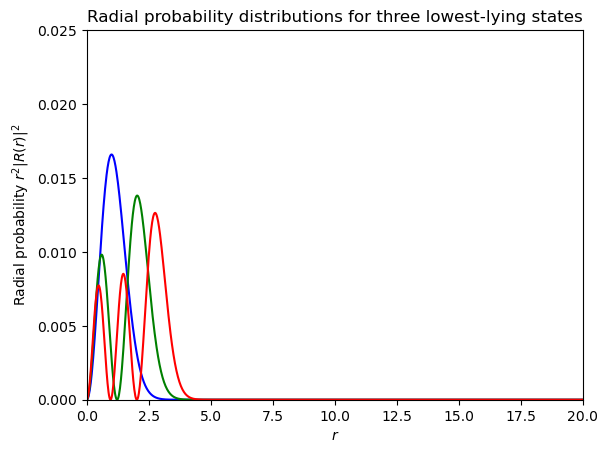

In [3]:
%matplotlib inline

#Program which solves the one-particle Schrodinger equation 
#for a potential specified in function
#potential(). This example is for the harmonic oscillator in 3d

from  matplotlib import pyplot as plt
import numpy as np
#Function for initialization of parameters
def initialize():
    RMin = 0.0
    RMax = 20.0
    lOrbital = 0
    Dim = 1000
    return RMin, RMax, lOrbital, Dim
# Here we set up the harmonic oscillator potential
def potential(r):
    return r*r*w2+1/r

#Get the boundary, orbital momentum and number of integration points
RMin, RMax, lOrbital, Dim = initialize()

#Initialize constants
Step    = RMax/(Dim+1)
DiagConst = 2.0 / (Step*Step)
NondiagConst =  -1.0 / (Step*Step)
OrbitalFactor = lOrbital * (lOrbital + 1.0)

#Calculate array of potential values
v = np.zeros(Dim)
r = np.linspace(RMin,RMax,Dim)
for i in range(Dim):
    r[i] = RMin + (i+1) * Step;
    v[i] = potential(r[i]) + OrbitalFactor/(r[i]*r[i]);

#Setting up a tridiagonal matrix and finding eigenvectors and eigenvalues
Hamiltonian = np.zeros((Dim,Dim))
Hamiltonian[0,0] = DiagConst + v[0];
Hamiltonian[0,1] = NondiagConst;
for i in range(1,Dim-1):
    Hamiltonian[i,i-1]  = NondiagConst;
    Hamiltonian[i,i]    = DiagConst + v[i];
    Hamiltonian[i,i+1]  = NondiagConst;
Hamiltonian[Dim-1,Dim-2] = NondiagConst;
Hamiltonian[Dim-1,Dim-1] = DiagConst + v[Dim-1];
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
# sort eigenvectors and eigenvalues
permute = EigValues.argsort()
EigValues = EigValues[permute]
EigVectors = EigVectors[:,permute]
# now plot the results for the three lowest lying eigenstates
for i in range(3):
    print (EigValues[i])
FirstEigvector = EigVectors[:,0]
SecondEigvector = EigVectors[:,1]
ThirdEigvector = EigVectors[:,2]
plt.plot(r, FirstEigvector**2 ,'b-',r, SecondEigvector**2 ,'g-',r, ThirdEigvector**2 ,'r-')
plt.axis([0,20,0.0, 0.025])
plt.xlabel(r'$r$')
plt.ylabel(r'Radial probability $r^2|R(r)|^2$')
plt.title(r'Radial probability distributions for three lowest-lying states')
plt.savefig('eigenvector.pdf')
plt.show()

## Two electrons that interact

We are going to study two electrons in a harmonic oscillator well which
also interact via a repulsive Coulomb interaction.
Let us start with the single-electron equation written as

$$
-\frac{\hbar^2}{2 m} \frac{d^2}{dr^2} u(r) 
       + \frac{1}{2}k r^2u(r)  = E^{(1)} u(r),
$$

where $E^{(1)}$ stands for the energy with one electron only.
For two electrons with no repulsive Coulomb interaction, we have the following 
Schroedinger equation

$$
\left(  -\frac{\hbar^2}{2 m} \frac{d^2}{dr_1^2} -\frac{\hbar^2}{2 m} \frac{d^2}{dr_2^2}+ \frac{1}{2}k r_1^2+ \frac{1}{2}k r_2^2\right)u(r_1,r_2)  = E^{(2)} u(r_1,r_2) .
$$

Note that we deal with a two-electron wave function $u(r_1,r_2)$ and 
two-electron energy $E^{(2)}$.

With no interaction this can be written out as the product of two
single-electron wave functions, that is we have a solution on closed form.

We introduce the relative coordinate $\mathbf{r} = \mathbf{r}_1-\mathbf{r}_2$
and the center-of-mass coordinate $\mathbf{R} = 1/2(\mathbf{r}_1+\mathbf{r}_2)$.
With these new coordinates, the radial Schroedinger equation reads

$$
\left(  -\frac{\hbar^2}{m} \frac{d^2}{dr^2} -\frac{\hbar^2}{4 m} \frac{d^2}{dR^2}+ \frac{1}{4} k r^2+  kR^2\right)u(r,R)  = E^{(2)} u(r,R).
$$

The equations for $r$ and $R$ can be separated via the ansatz for the 
wave function $u(r,R) = \psi(r)\phi(R)$ and the energy is given by the sum
of the relative energy $E_r$ and the center-of-mass energy $E_R$, that

$$
E^{(2)}=E_r+E_R.
$$

We add then the repulsive Coulomb interaction between two electrons,
namely a term

$$
V(r_1,r_2) = \frac{\beta e^2}{|\mathbf{r}_1-\mathbf{r}_2|}=\frac{\beta e^2}{r},
$$

with $\beta e^2=1.44$ eVnm.

Adding this term, the $r$-dependent Schroedinger equation becomes

$$
\left(  -\frac{\hbar^2}{m} \frac{d^2}{dr^2}+ \frac{1}{4}k r^2+\frac{\beta e^2}{r}\right)\psi(r)  = E_r \psi(r).
$$

This equation is similar to the one we had previously in parts (a) and (b) 
and we introduce
again a dimensionless variable $\rho = r/\alpha$. Repeating the same
steps, we arrive at

$$
-\frac{d^2}{d\rho^2} \psi(\rho) 
       + \frac{mk}{4\hbar^2} \alpha^4\rho^2\psi(\rho)+\frac{m\alpha \beta e^2}{\rho\hbar^2}\psi(\rho)  = 
\frac{m\alpha^2}{\hbar^2}E_r \psi(\rho) .
$$

We want to manipulate this equation further to make it as similar to that in (a)
as possible. We define a 'frequency'

$$
\omega_r^2=\frac{1}{4}\frac{mk}{\hbar^2} \alpha^4,
$$

and fix the constant $\alpha$ by requiring

$$
\frac{m\alpha \beta e^2}{\hbar^2}=1
$$

or

$$
\alpha = \frac{\hbar^2}{m\beta e^2}.
$$

Defining

$$
\lambda = \frac{m\alpha^2}{\hbar^2}E,
$$

we can rewrite Schroedinger's equation as

$$
-\frac{d^2}{d\rho^2} \psi(\rho) + \omega_r^2\rho^2\psi(\rho) +\frac{1}{\rho}\psi(\rho) = \lambda \psi(\rho).
$$

We treat $\omega_r$ as a parameter which reflects the strength of the oscillator potential.

Here we will study the cases $\omega_r = 0.01$, $\omega_r = 0.5$, $\omega_r =1$,
and $\omega_r = 5$   
for the ground state only, that is the lowest-lying state.

With no repulsive Coulomb interaction 
you should get a result which corresponds to 
the relative energy of a non-interacting system.   
Make sure your results are 
stable as functions of $\rho_{\mathrm{max}}$ and the number of steps.

We are only interested in the ground state with $l=0$. We omit the 
center-of-mass energy.

For specific oscillator frequencies, the above equation has analytic answers,
see the article by M. Taut, Phys. Rev. A 48, 3561 - 3566 (1993).
The article can be retrieved from the following web address <http://prola.aps.org/abstract/PRA/v48/i5/p3561_1>.

## Discussion of Householder's method for eigenvalues

The drawbacks with Jacobi's method are rather obvious, with perhaps the most negative feature being the fact that we cannot tell * a priori* how many transformations are needed. Can we do better?  
The answer to this is yes and is given by a clever algorithm outlined by Householder. It was ranked among the top ten algorithms in the previous century.  We will discuss this algorithm in more detail below.

The first step  consists in finding
an orthogonal  matrix $\mathbf{S}$ which is the product of $(n-2)$ orthogonal matrices

$$
\mathbf{S}=\mathbf{S}_1\mathbf{S}_2\dots\mathbf{S}_{n-2},
$$

each of which successively transforms one row and one column of $\mathbf{A}$ into the 
required tridiagonal form. Only $n-2$ transformations are required, since the last two
elements are already in tridiagonal form. 

In order to determine each $\mathbf{S}_i$ let us
see what happens after the first multiplication, namely,

$$
\mathbf{S}_1^T\mathbf{A}\mathbf{S}_1=    \left( \begin{array}{ccccccc} a_{11} & e_1 & 0   & 0    & \dots  &0     & 0 \\
                                e_1 & a'_{22} &a'_{23}  & \dots    & \dots  &\dots &a'_{2n} \\
                                0   & a'_{32} &a'_{33}  & \dots    & \dots  &\dots &a'_{3n} \\
                                0   & \dots &\dots & \dots    & \dots  &\dots & \\
                                0   & a'_{n2} &a'_{n3}  & \dots    & \dots  &\dots &a'_{nn} \\
             \end{array} \right)
$$

where the primed quantities represent a matrix $\mathbf{A}'$ of dimension
$n-1$ which will subsequentely be transformed by $\mathbf{S}_2$.

The factor  $e_1$ is a possibly non-vanishing element. The next
transformation produced by $\mathbf{S}_2$ has the same effect as  $\mathbf{S}s$ but now on the submatirx $\mathbf{A^{'}}$ only

$$
\left (\mathbf{S}_{1}\mathbf{S}_{2} \right )^{T} \mathbf{A}\mathbf{S}_{1} \mathbf{S}_{2}
 = \left( \begin{array}{ccccccc} a_{11} & e_1 & 0   & 0    & \dots  &0     & 0 \\
                                e_1 & a'_{22} &e_2  & 0   & \dots  &\dots &0 \\
                                0   & e_2 &a''_{33}  & \dots    & \dots  &\dots &a''_{3n} \\
                                0   & \dots &\dots & \dots    & \dots  &\dots & \\
                                0   & 0 &a''_{n3}  & \dots    & \dots  &\dots &a''_{nn} \\
             \end{array} \right)
$$

*Note that the effective size of the matrix on which we apply the transformation reduces for every new step. In the previous Jacobi method each similarity transformation is in principle performed on the full size of the original matrix*.

After a series of such transformations, we end with a set of diagonal
matrix elements

$$
a_{11}, a'_{22}, a''_{33}\dots a^{n-1}_{nn},
$$

and off-diagonal matrix elements

$$
e_1, e_2,e_3,  \dots, e_{n-1}.
$$

The resulting matrix reads

$$
\mathbf{S}^{T} \mathbf{A} \mathbf{S} = 
    \left( \begin{array}{ccccccc} a_{11} & e_1 & 0   & 0    & \dots  &0     & 0 \\
                                e_1 & a'_{22} & e_2 & 0    & \dots  &0     &0 \\
                                0   & e_2 & a''_{33} & e_3  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &\dots       &a^{(n-1)}_{n-2} & e_{n-1}\\
                                0   & \dots & \dots & \dots  &\dots       &e_{n-1} & a^{(n-1)}_{nn}
             \end{array} \right) .
$$

It remains to find a recipe for determining the transformation $\mathbf{S}_n$.
We illustrate the method for $\mathbf{S}_1$ which we assume takes the form

$$
\mathbf{S_{1}} = \left( \begin{array}{cc} 1 & \mathbf{0^{T}} \\
                              \mathbf{0}& \mathbf{P} \end{array} \right),
$$

with $\mathbf{0^{T}}$ being a zero row vector, $\mathbf{0^{T}} = \{0,0,\cdots\}$
of dimension $(n-1)$. The matrix $\mathbf{P}$  is symmetric 
with dimension ($(n-1) \times (n-1)$) satisfying
$\mathbf{P}^2=\mathbf{I}$  and $\mathbf{P}^T=\mathbf{P}$. 
A possible choice which fullfils the latter two requirements is

$$
\mathbf{P}=\mathbf{I}-2\mathbf{u}\mathbf{u}^T,
$$

where $\mathbf{I}$ is the $(n-1)$ unity matrix and $\mathbf{u}$ is an $n-1$
column vector with norm $\mathbf{u}^T\mathbf{u}$ (inner product).

 Note that $\mathbf{u}\mathbf{u}^T$ is an outer product giving a
matrix of dimension ($(n-1) \times (n-1)$). 
Each matrix element of $\mathbf{P}$ then reads

$$
P_{ij}=\delta_{ij}-2u_iu_j,
$$

where $i$ and $j$ range from $1$ to $n-1$. Applying the transformation  
$\mathbf{S}_1$ results in

$$
\mathbf{S}_1^T\mathbf{A}\mathbf{S}_1 =  \left( \begin{array}{cc} a_{11} & (\mathbf{Pv})^T \\
                              \mathbf{Pv}& \mathbf{A}' \end{array} \right) ,
$$

where $\mathbf{v^{T}} = \{a_{21}, a_{31},\cdots, a_{n1}\}$ and $\mathbf{P}$s
must satisfy ($\mathbf{Pv})^{T} = \{k, 0, 0,\cdots \}$. Then

<!-- Equation labels as ordinary links -->
<div id="eq:palpha"></div>

$$
\begin{equation}
    \mathbf{Pv} = \mathbf{v} -2\mathbf{u}( \mathbf{u}^T\mathbf{v})= k \mathbf{e},
\label{eq:palpha} \tag{6}
\end{equation}
$$

with $\mathbf{e^{T}} = \{1,0,0,\dots 0\}$.

Solving the latter equation gives us $\mathbf{u}$ and thus the needed transformation
$\mathbf{P}$. We do first however need to compute the scalar $k$ by taking the scalar
product of the last equation with its transpose and using the fact that $\mathbf{P}^2=\mathbf{I}$.
We get then

$$
(\mathbf{Pv})^T\mathbf{Pv} = k^{2} = \mathbf{v}^T\mathbf{v}=
   |v|^2 = \sum_{i=2}^{n}a_{i1}^2,
$$

which determines the constant $ k = \pm v$.

 Now we can rewrite Eq. ([6](#eq:palpha))
as

$$
\mathbf{v} - k\mathbf{e} = 2\mathbf{u}( \mathbf{u}^T\mathbf{v}),
$$

and taking the scalar product of this equation with itself and obtain

<!-- Equation labels as ordinary links -->
<div id="eq:pmalpha"></div>

$$
\begin{equation}
    2( \mathbf{u}^T\mathbf{v})^2=(v^2\pm a_{21}v),
\label{eq:pmalpha} \tag{7}
\end{equation}
$$

which finally determines

$$
\mathbf{u}=\frac{\mathbf{v}-k\mathbf{e}}{2( \mathbf{u}^T\mathbf{v})}.
$$

In solving Eq. ([7](#eq:pmalpha)) great care has to be exercised so as to choose
those values which make the right-hand largest in order to avoid loss of numerical
precision. 
The above steps are then repeated for every transformations till we have a 
tridiagonal matrix suitable for obtaining the eigenvalues.  

Our Householder transformation has given us a tridiagonal matrix. We discuss here how one can use
Householder's iterative procedure to obtain the eigenvalues. 
Let us specialize to a $4\times 4 $ matrix.
The tridiagonal matrix takes the form

$$
\mathbf{A} =
      \left( \begin{array}{cccc} 
                d_{1} & e_{1} & 0     &  0    \\
                e_{1} & d_{2} & e_{2} &  0    \\
                 0    & e_{2} & d_{3} & e_{3} \\
                 0    &   0   & e_{3} & d_{4} 
             \end{array} \right).
$$

As a first observation, if any of the elements $e_{i}$ are zero the
matrix can be separated into smaller pieces before
diagonalization. Specifically, if $e_{1} = 0$ then $d_{1}$ is an
eigenvalue.

 Thus, let us introduce  a transformation $\mathbf{S_{1}}$ which operates like

$$
\mathbf{S_{1}} =
      \left( \begin{array}{cccc} 
                \cos \theta & 0 & 0 & \sin \theta\\
                 0       & 0 & 0 &      0      \\
                   0        & 0 & 0 &      0      \\
               \cos \theta & 0 & 0 & \cos \theta 
             \end{array} \right)
$$

Then the similarity transformation

$$
\mathbf{S_{1}^{T} A  S_{1}} = \mathbf{A'} = 
      \left( \begin{array}{cccc}
              d'_{1} & e'_{1} &   0    &   0   \\
              e'_{1}  & d_{2}  & e_{2}  &   0   \\
                0    & e_{2}  & d_{3}  & e'{3} \\
                0    &   0    & e'_{3} & d'_{4}
             \end{array} \right)
$$

produces a matrix where the primed elements in $\mathbf{A'}$ have been
changed by the transformation whereas the unprimed elements are unchanged.
If we now choose $\theta$ to
give the element $a_{21}^{'} = e^{'}= 0$ then we have the first
eigenvalue  $= a_{11}^{'} = d_{1}^{'}$.

This procedure can be continued on the remaining three-dimensional
submatrix for the next eigenvalue. Thus after few transformations    
we have the wanted diagonal form.

What we see here is just a special case of the more general procedure 
developed by Francis in two articles in 1961 and 1962.

The algorithm is based on the so-called *QR* method (or just *QR*-algorithm). It follows from a theorem by Schur which states that any square matrix can be written out in terms of an orthogonal matrix $\mathbf{Q}$ and an upper triangular matrix $\mathbf{U}$. Historically *R* was used instead of 
*U* since the wording right triangular matrix was first used.
The method is based on an iterative procedure similar to Jacobi's method, by a succession of
planar rotations. For a tridiagonal matrix it is simple to carry out in principle, but complicated in detail.

## Eigenvalues

The eigenvalues of a  tridiagonal matrix can be obtained using the characteristic polynomial

$$
P(\lambda) = det(\lambda\mathbf{I}-\mathbf{A})= \prod_{i=1}^{n}\left(\lambda_i-\lambda\right),
$$

which rewritten in matrix form reads

$$
P(\lambda)= \left( \begin{array}{ccccccc} d_1-\lambda & e_1 & 0   & 0    & \dots  &0     & 0 \\
                                e_1 & d_2-\lambda & e_2 & 0    & \dots  &0     &0 \\
                                0   & e_2 & d_3-\lambda & e_3  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &\dots       &d_{N_{\mathrm{step}}-2}-\lambda & e_{N_{\mathrm{step}}-1}\\
                                0   & \dots & \dots & \dots  &\dots       &e_{N_{\mathrm{step}}-1} & d_{N_{\mathrm{step}}-1}-\lambda
             \end{array} \right)
$$

We can solve this equation in an iterative manner. 
We let $P_k(\lambda)$ be the value of $k$ subdeterminant of the above matrix of dimension
$n\times n$. The polynomial $P_k(\lambda)$ is clearly a polynomial of degree $k$.
Starting with $P_1(\lambda)$ we have $P_1(\lambda)=d_1-\lambda$. The next polynomial reads
$P_2(\lambda)=(d_2-\lambda)P_1(\lambda)-e_1^2$. By expanding the determinant for $P_k(\lambda)$ 
in terms of the minors of the $n$th column we arrive at the recursion relation
\[ 
   P_k(\lambda)=(d_k-\lambda)P_{k-1}(\lambda)-e_{k-1}^2P_{k-2}(\lambda).
\]
Together with the starting values $P_1(\lambda)$ and $P_2(\lambda)$ and good root searching methods
we arrive at an efficient computational scheme for finding the roots of $P_n(\lambda)$. 
However, for large matrices this algorithm is rather inefficient and time-consuming.

## Eigenvalues and Lanczos' method

Basic features with a real symmetric matrix (and normally huge $n> 10^6$ and sparse) 
$\hat{A}$ of dimension $n\times n$:

* Lanczos' algorithm generates a sequence of real tridiagonal matrices $T_k$ of dimension $k\times k$ with $k\le n$, with the property that the extremal eigenvalues of $T_k$ are progressively better estimates of $\hat{A}$' extremal eigenvalues.* The method converges to the extremal eigenvalues.

* The similarity transformation is

$$
\hat{T}= \hat{Q}^{T}\hat{A}\hat{Q},
$$

with the first vector $\hat{Q}\hat{e}_1=\hat{q}_1$.

We are going to solve iteratively

$$
\hat{T}= \hat{Q}^{T}\hat{A}\hat{Q},
$$

with the first vector $\hat{Q}\hat{e}_1=\hat{q}_1$.
We can write out the matrix $\hat{Q}$ in terms of its column vectors

$$
\hat{Q}=\left[\hat{q}_1\hat{q}_2\dots\hat{q}_n\right].
$$

The matrix

$$
\hat{T}= \hat{Q}^{T}\hat{A}\hat{Q},
$$

can be written as

$$
\hat{T} = \left(\begin{array}{cccccc}
                           \alpha_1& \beta_1 & 0 &\dots   & \dots &0 \\
                           \beta_1 & \alpha_2 & \beta_2 &0 &\dots &0 \\
                           0& \beta_2 & \alpha_3 & \beta_3 & \dots &0 \\
                           \dots& \dots   & \dots &\dots   &\dots & 0 \\
                           \dots&   &  &\beta_{n-2}  &\alpha_{n-1}& \beta_{n-1} \\
                           0&  \dots  &\dots  &0   &\beta_{n-1} & \alpha_{n} \\
                      \end{array} \right)
$$

Using the fact that

$$
\hat{Q}\hat{Q}^T=\hat{I},
$$

we can rewrite

$$
\hat{T}= \hat{Q}^{T}\hat{A}\hat{Q},
$$

as

$$
\hat{Q}\hat{T}= \hat{A}\hat{Q}.
$$

If we equate columns

$$
\hat{T} = \left(\begin{array}{cccccc}
        \alpha_1& \beta_1 & 0 &\dots   & \dots &0 \\
        \beta_1 & \alpha_2 & \beta_2 &0 &\dots &0 \\
        0& \beta_2 & \alpha_3 & \beta_3 & \dots &0 \\
        \dots& \dots   & \dots &\dots   &\dots & 0 \\
        \dots&   &  &\beta_{n-2}  &\alpha_{n-1}& \beta_{n-1} \\
        0&  \dots  &\dots  &0   &\beta_{n-1} & \alpha_{n} \\
        \end{array} \right)
$$

we obtain

$$
\hat{A}\hat{q}_k=\beta_{k-1}\hat{q}_{k-1}+\alpha_k\hat{q}_k+\beta_k\hat{q}_{k+1}.
$$

We have thus

$$
\hat{A}\hat{q}_k=\beta_{k-1}\hat{q}_{k-1}+\alpha_k\hat{q}_k+\beta_k\hat{q}_{k+1},
$$

with $\beta_0\hat{q}_0=0$ for $k=1:n-1$. Remember that the vectors $\hat{q}_k$  are orthornormal and this implies

$$
\alpha_k=\hat{q}_k^T\hat{A}\hat{q}_k,
$$

and these vectors are called Lanczos vectors.

We have thus

$$
\hat{A}\hat{q}_k=\beta_{k-1}\hat{q}_{k-1}+\alpha_k\hat{q}_k+\beta_k\hat{q}_{k+1},
$$

with $\beta_0\hat{q}_0=0$ for $k=1:n-1$ and

$$
\alpha_k=\hat{q}_k^T\hat{A}\hat{q}_k.
$$

If

$$
\hat{r}_k=(\hat{A}-\alpha_k\hat{I})\hat{q}_k-\beta_{k-1}\hat{q}_{k-1},
$$

is non-zero, then

$$
\hat{q}_{k+1}=\hat{r}_{k}/\beta_k,
$$

with $\beta_k=\pm ||\hat{r}_{k}||_2$.

# Variational Monte Carlo methods

## Quantum Monte Carlo Motivation

We start with the variational principle.
Given a hamiltonian $H$ and a trial wave function $\Psi_T$, the variational principle states that the expectation value of $\langle H \rangle$, defined through

$$
E[H]= \langle H \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})H(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})},
$$

is an upper bound to the ground state energy $E_0$ of the hamiltonian $H$, that is

$$
E_0 \le \langle H \rangle .
$$

In general, the integrals involved in the calculation of various  expectation values  are multi-dimensional ones. Traditional integration methods such as the Gauss-Legendre will not be adequate for say the  computation of the energy of a many-body system.

The trial wave function can be expanded in the eigenstates of the hamiltonian since they form a complete set, viz.,

$$
\Psi_T(\boldsymbol{R})=\sum_i a_i\Psi_i(\boldsymbol{R}),
$$

and assuming the set of eigenfunctions to be normalized one obtains

$$
\frac{\sum_{nm}a^*_ma_n \int d\boldsymbol{R}\Psi^{\ast}_m(\boldsymbol{R})H(\boldsymbol{R})\Psi_n(\boldsymbol{R})}
        {\sum_{nm}a^*_ma_n \int d\boldsymbol{R}\Psi^{\ast}_m(\boldsymbol{R})\Psi_n(\boldsymbol{R})} =\frac{\sum_{n}a^2_n E_n}
        {\sum_{n}a^2_n} \ge E_0,
$$

where we used that $H(\boldsymbol{R})\Psi_n(\boldsymbol{R})=E_n\Psi_n(\boldsymbol{R})$.
In general, the integrals involved in the calculation of various  expectation
values  are multi-dimensional ones. 
The variational principle yields the lowest state of a given symmetry.

In most cases, a wave function has only small values in large parts of 
configuration space, and a straightforward procedure which uses
homogenously distributed random points in configuration space 
will most likely lead to poor results. This may suggest that some kind
of importance sampling combined with e.g., the Metropolis algorithm 
may be  a more efficient way of obtaining the ground state energy.
The hope is then that those regions of configurations space where
the wave function assumes appreciable values are sampled more 
efficiently. 

The tedious part in a VMC calculation is the search for the variational
minimum. A good knowledge of the system is required in order to carry out
reasonable VMC calculations. This is not always the case, 
and often VMC calculations 
serve rather as the starting
point for so-called diffusion Monte Carlo calculations (DMC). DMC is a way of
solving exactly the many-body Schroedinger equation by means of 
a stochastic procedure. A good guess on the binding energy
and its wave function is however necessary. 
A carefully performed VMC calculation can aid in this context. 

The basic recipe in a VMC calculation consists of the following elements:

* Construct first a trial wave function $\psi_T(\boldsymbol{R},\boldsymbol{\alpha})$,  for a many-body system consisting of $N$ particles located at positions  $\boldsymbol{R}=(\boldsymbol{R}_1,\dots ,\boldsymbol{R}_N)$. The trial wave function depends on $\alpha$ variational parameters $\boldsymbol{\alpha}=(\alpha_1,\dots ,\alpha_M)$.

* Then we evaluate the expectation value of the hamiltonian $H$

$$
E[H]=\langle H \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_{T}(\boldsymbol{R},\boldsymbol{\alpha})H(\boldsymbol{R})\Psi_{T}(\boldsymbol{R},\boldsymbol{\alpha})}
        {\int d\boldsymbol{R}\Psi^{\ast}_{T}(\boldsymbol{R},\boldsymbol{\alpha})\Psi_{T}(\boldsymbol{R},\boldsymbol{\alpha})}.
$$

* Thereafter we vary $\alpha$ according to some minimization algorithm and return to the first step.

With a trial wave function $\psi_T(\boldsymbol{R})$ we can in turn construct the quantum mechanical probability distribution

$$
P(\boldsymbol{R})= \frac{\left|\psi_T(\boldsymbol{R})\right|^2}{\int \left|\psi_T(\boldsymbol{R})\right|^2d\boldsymbol{R}}.
$$

This is our new probability distribution function  (PDF).
The approximation to the expectation value of the Hamiltonian is now

$$
E[H(\boldsymbol{\alpha})] = 
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R},\boldsymbol{\alpha})H(\boldsymbol{R})\Psi_T(\boldsymbol{R},\boldsymbol{\alpha})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R},\boldsymbol{\alpha})\Psi_T(\boldsymbol{R},\boldsymbol{\alpha})}.
$$

Define a new quantity

<!-- Equation labels as ordinary links -->
<div id="eq:locale1"></div>

$$
E_L(\boldsymbol{R},\boldsymbol{\alpha})=\frac{1}{\psi_T(\boldsymbol{R},\boldsymbol{\alpha})}H\psi_T(\boldsymbol{R},\boldsymbol{\alpha}),
\label{eq:locale1} \tag{8}
$$

called the local energy, which, together with our trial PDF yields

<!-- Equation labels as ordinary links -->
<div id="eq:vmc1"></div>

$$
E[H(\boldsymbol{\alpha})]=\int P(\boldsymbol{R})E_L(\boldsymbol{R}) d\boldsymbol{R}\approx \frac{1}{N}\sum_{i=1}^NP(\boldsymbol{R_i},\boldsymbol{\alpha})E_L(\boldsymbol{R_i},\boldsymbol{\alpha})
\label{eq:vmc1} \tag{9}
$$

with $N$ being the number of Monte Carlo samples.

The Algorithm for performing a variational Monte Carlo calculations runs thus as this

   * Initialisation: Fix the number of Monte Carlo steps. Choose an initial $\boldsymbol{R}$ and variational parameters $\alpha$ and calculate $\left|\psi_T^{\alpha}(\boldsymbol{R})\right|^2$. 

   * Initialise the energy and the variance and start the Monte Carlo calculation.

      * Calculate  a trial position  $\boldsymbol{R}_p=\boldsymbol{R}+r*step$ where $r$ is a random variable $r \in [0,1]$.

      * Metropolis algorithm to accept or reject this move  $w = P(\boldsymbol{R}_p)/P(\boldsymbol{R})$.

      * If the step is accepted, then we set $\boldsymbol{R}=\boldsymbol{R}_p$. 

      * Update averages

   * Finish and compute final averages.

Observe that the jumping in space is governed by the variable *step*. This is Called brute-force sampling.
Need importance sampling to get more relevant sampling, see lectures below.

### Quantum Monte Carlo: hydrogen atom

The radial Schroedinger equation for the hydrogen atom can be
written as

$$
-\frac{\hbar^2}{2m}\frac{\partial^2 u(r)}{\partial r^2}-
\left(\frac{ke^2}{r}-\frac{\hbar^2l(l+1)}{2mr^2}\right)u(r)=Eu(r),
$$

or with dimensionless variables

<!-- Equation labels as ordinary links -->
<div id="eq:hydrodimless1"></div>

$$
-\frac{1}{2}\frac{\partial^2 u(\rho)}{\partial \rho^2}-
\frac{u(\rho)}{\rho}+\frac{l(l+1)}{2\rho^2}u(\rho)-\lambda u(\rho)=0,
\label{eq:hydrodimless1} \tag{10}
$$

with the hamiltonian

$$
H=-\frac{1}{2}\frac{\partial^2 }{\partial \rho^2}-
\frac{1}{\rho}+\frac{l(l+1)}{2\rho^2}.
$$

Use variational parameter $\alpha$ in the trial
wave function

<!-- Equation labels as ordinary links -->
<div id="eq:trialhydrogen"></div>

$$
u_T^{\alpha}(\rho)=\alpha\rho e^{-\alpha\rho}. 
\label{eq:trialhydrogen} \tag{11}
$$

Inserting this wave function into the expression for the
local energy $E_L$ gives

$$
E_L(\rho)=-\frac{1}{\rho}-
              \frac{\alpha}{2}\left(\alpha-\frac{2}{\rho}\right).
$$

A simple variational Monte Carlo calculation results in
<table class="dotable" border="1">
<thead>
<tr><th align="center">  $\alpha$ </th> <th align="center">$\langle H \rangle $</th> <th align="center"> $\sigma^2$</th> <th align="center">$\sigma/\sqrt{N}$</th> </tr>
</thead>
<tbody>
<tr><td align="center">   7.00000E-01    </td> <td align="center">   -4.57759E-01            </td> <td align="center">   4.51201E-02    </td> <td align="center">   6.71715E-04          </td> </tr>
<tr><td align="center">   8.00000E-01    </td> <td align="center">   -4.81461E-01            </td> <td align="center">   3.05736E-02    </td> <td align="center">   5.52934E-04          </td> </tr>
<tr><td align="center">   9.00000E-01    </td> <td align="center">   -4.95899E-01            </td> <td align="center">   8.20497E-03    </td> <td align="center">   2.86443E-04          </td> </tr>
<tr><td align="center">   1.00000E-00    </td> <td align="center">   -5.00000E-01            </td> <td align="center">   0.00000E+00    </td> <td align="center">   0.00000E+00          </td> </tr>
<tr><td align="center">   1.10000E+00    </td> <td align="center">   -4.93738E-01            </td> <td align="center">   1.16989E-02    </td> <td align="center">   3.42036E-04          </td> </tr>
<tr><td align="center">   1.20000E+00    </td> <td align="center">   -4.75563E-01            </td> <td align="center">   8.85899E-02    </td> <td align="center">   9.41222E-04          </td> </tr>
<tr><td align="center">   1.30000E+00    </td> <td align="center">   -4.54341E-01            </td> <td align="center">   1.45171E-01    </td> <td align="center">   1.20487E-03          </td> </tr>
</tbody>
</table>

We note that at $\alpha=1$ we obtain the exact
result, and the variance is zero, as it should. The reason is that 
we then have the exact wave function, and the action of the hamiltionan
on the wave function

$$
H\psi = \mathrm{constant}\times \psi,
$$

yields just a constant. The integral which defines various 
expectation values involving moments of the hamiltonian becomes then

$$
\langle H^n \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})H^n(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}=
\mathrm{constant}\times\frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}=\mathrm{constant}.
$$

**This gives an important information: the exact wave function leads to zero variance!**
Variation is then performed by minimizing both the energy and the variance.

### A simple Python code that solves the two-boson or two-fermion case in two-dimensions

/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_28800/4924647.py:92: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


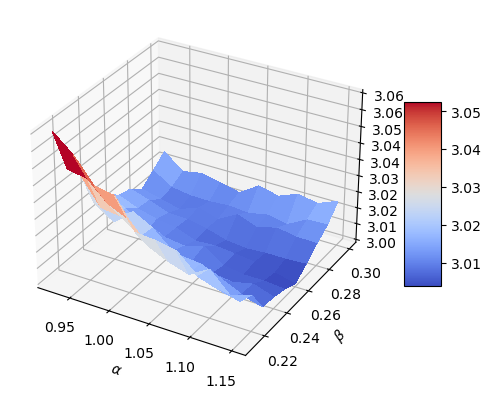

In [4]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

#Trial wave function for quantum dots in two dims
def WaveFunction(r,alpha,beta):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = r12/(1+beta*r12)
    return exp(-0.5*alpha*(r1+r2)+deno)

#Local energy  for quantum dots in two dims, using analytical local energy
def LocalEnergy(r,alpha,beta):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha + 1.0/r12+deno2*(alpha*r12-deno2+2*beta*deno-1.0/r12)

# The Monte Carlo sampling with the Metropolis algo
def MonteCarloSampling():

    NumberMCcycles= 100000
    StepSize = 1.0
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # seed for rng generator
    seed()
    # start variational parameter
    alpha = 0.9
    for ia in range(MaxVariations):
        alpha += .025
        AlphaValues[ia] = alpha
        beta = 0.2 
        for jb in range(MaxVariations):
            beta += .01
            BetaValues[jb] = beta
            energy = energy2 = 0.0
            DeltaE = 0.0
            #Initial position
            for i in range(NumberParticles):
                for j in range(Dimension):
                    PositionOld[i,j] = StepSize * (random() - .5)
            wfold = WaveFunction(PositionOld,alpha,beta)

            #Loop over MC MCcycles
            for MCcycle in range(NumberMCcycles):
                #Trial position
                for i in range(NumberParticles):
                    for j in range(Dimension):
                        PositionNew[i,j] = PositionOld[i,j] + StepSize * (random() - .5)
                wfnew = WaveFunction(PositionNew,alpha,beta)

                #Metropolis test to see whether we accept the move
                if random() < wfnew**2 / wfold**2:
                   PositionOld = PositionNew.copy()
                   wfold = wfnew
                   DeltaE = LocalEnergy(PositionOld,alpha,beta)
                energy += DeltaE
                energy2 += DeltaE**2

            #We calculate mean, variance and error ...
            energy /= NumberMCcycles
            energy2 /= NumberMCcycles
            variance = energy2 - energy**2
            error = sqrt(variance/NumberMCcycles)
            Energies[ia,jb] = energy    
    return Energies, AlphaValues, BetaValues


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
MaxVariations = 10
Energies = np.zeros((MaxVariations,MaxVariations))
AlphaValues = np.zeros(MaxVariations)
BetaValues = np.zeros(MaxVariations)
(Energies, AlphaValues, BetaValues) = MonteCarloSampling()

# Prepare for plots
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
X, Y = np.meshgrid(AlphaValues, BetaValues)
surf = ax.plot_surface(X, Y, Energies,cmap=cm.coolwarm,linewidth=0, antialiased=False)
# Customize the z axis.
zmin = np.matrix(Energies).min()
zmax = np.matrix(Energies).max()
ax.set_zlim(zmin, zmax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel(r'$\langle E \rangle$')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Quantum Monte Carlo: the helium atom

The helium atom consists of two electrons and a nucleus with
charge $Z=2$. 
The contribution  
to the potential energy due to the attraction from the nucleus is

$$
-\frac{2ke^2}{r_1}-\frac{2ke^2}{r_2},
$$

and if we add the repulsion arising from the two 
interacting electrons, we obtain the potential energy

$$
V(r_1, r_2)=-\frac{2ke^2}{r_1}-\frac{2ke^2}{r_2}+
               \frac{ke^2}{r_{12}},
$$

with the electrons separated at a distance 
$r_{12}=|\boldsymbol{r}_1-\boldsymbol{r}_2|$.

The hamiltonian becomes then

$$
\hat{H}=-\frac{\hbar^2\nabla_1^2}{2m}-\frac{\hbar^2\nabla_2^2}{2m}
          -\frac{2ke^2}{r_1}-\frac{2ke^2}{r_2}+
               \frac{ke^2}{r_{12}},
$$

and  Schroedingers equation reads

$$
\hat{H}\psi=E\psi.
$$

All observables are evaluated with respect to the probability distribution

$$
P(\boldsymbol{R})= \frac{\left|\psi_T(\boldsymbol{R})\right|^2}{\int \left|\psi_T(\boldsymbol{R})\right|^2d\boldsymbol{R}}.
$$

generated by the trial wave function.   
The trial wave function must approximate an exact 
eigenstate in order that accurate results are to be obtained. 

Choice of trial wave function for Helium:
Assume $r_1 \rightarrow 0$.

$$
E_L(\boldsymbol{R})=\frac{1}{\psi_T(\boldsymbol{R})}H\psi_T(\boldsymbol{R})=
     \frac{1}{\psi_T(\boldsymbol{R})}\left(-\frac{1}{2}\nabla^2_1
     -\frac{Z}{r_1}\right)\psi_T(\boldsymbol{R}) + \mathrm{finite \hspace{0.1cm}terms}.
$$

$$
E_L(R)=
    \frac{1}{\mathbf{R}_T(r_1)}\left(-\frac{1}{2}\frac{d^2}{dr_1^2}-
     \frac{1}{r_1}\frac{d}{dr_1}
     -\frac{Z}{r_1}\right)\mathbf{R}_T(r_1) + \mathrm{finite\hspace{0.1cm} terms}
$$

For small values of $r_1$, the terms which dominate are

$$
\lim_{r_1 \rightarrow 0}E_L(R)=
    \frac{1}{\mathbf{R}_T(r_1)}\left(-
     \frac{1}{r_1}\frac{d}{dr_1}
     -\frac{Z}{r_1}\right)\mathbf{R}_T(r_1),
$$

since the second derivative does not diverge due to the finiteness of  $\Psi$ at the origin.

This results in

$$
\frac{1}{\mathbf{R}_T(r_1)}\frac{d \mathbf{R}_T(r_1)}{dr_1}=-Z,
$$

and

$$
\mathbf{R}_T(r_1)\propto e^{-Zr_1}.
$$

A similar condition applies to electron 2 as well. 
For orbital momenta $l > 0$ we have

$$
\frac{1}{\mathbf{R}_T(r)}\frac{d \mathbf{R}_T(r)}{dr}=-\frac{Z}{l+1}.
$$

Similarly, studying the case $r_{12}\rightarrow 0$ we can write 
a possible trial wave function as

<!-- Equation labels as ordinary links -->
<div id="eq:wavehelium2"></div>

$$
\psi_T(\boldsymbol{R})=e^{-\alpha(r_1+r_2)}e^{\beta r_{12}}.
\label{eq:wavehelium2} \tag{12}
$$

The last equation can be generalized to

$$
\psi_T(\boldsymbol{R})=\phi(\boldsymbol{r}_1)\phi(\boldsymbol{r}_2)\dots\phi(\boldsymbol{r}_N)
                   \prod_{i < j}f(r_{ij}),
$$

for a system with $N$ electrons or particles. 

During the development of our code we need to make several checks. It is also very instructive to compute a closed form expression for the local energy. Since our wave function is rather simple  it is straightforward
to find an analytic expressions.  Consider first the case of the simple helium function

$$
\Psi_T(\boldsymbol{r}_1,\boldsymbol{r}_2) = e^{-\alpha(r_1+r_2)}
$$

The local energy is for this case

$$
E_{L1} = \left(\alpha-Z\right)\left(\frac{1}{r_1}+\frac{1}{r_2}\right)+\frac{1}{r_{12}}-\alpha^2
$$

which gives an expectation value for the local energy given by

$$
\langle E_{L1} \rangle = \alpha^2-2\alpha\left(Z-\frac{5}{16}\right)
$$

With closed form formulae we  can speed up the computation of the correlation. In our case
we write it as

$$
\Psi_C= \exp{\left\{\sum_{i < j}\frac{ar_{ij}}{1+\beta r_{ij}}\right\}},
$$

which means that the gradient needed for the so-called quantum force and local energy 
can be calculated analytically.
This will speed up your code since the computation of the correlation part and the Slater determinant are the most 
time consuming parts in your code.  

We will refer to this correlation function as $\Psi_C$ or the *linear Pade-Jastrow*.

We can test this by computing the local energy for our helium wave function

$$
\psi_{T}(\boldsymbol{r}_1,\boldsymbol{r}_2) = 
   \exp{\left(-\alpha(r_1+r_2)\right)}
   \exp{\left(\frac{r_{12}}{2(1+\beta r_{12})}\right)},
$$

with $\alpha$ and $\beta$ as variational parameters.

The local energy is for this case

$$
E_{L2} = E_{L1}+\frac{1}{2(1+\beta r_{12})^2}\left\{\frac{\alpha(r_1+r_2)}{r_{12}}(1-\frac{\boldsymbol{r}_1\boldsymbol{r}_2}{r_1r_2})-\frac{1}{2(1+\beta r_{12})^2}-\frac{2}{r_{12}}+\frac{2\beta}{1+\beta r_{12}}\right\}
$$

It is very useful to test your code against these expressions. It means also that you don't need to
compute a derivative numerically as discussed in the code example below. 

For the computation of various derivatives with different types of wave functions, you will find it useful to use python with symbolic python, that is sympy, see [online manual](http://docs.sympy.org/latest/index.html).  Using sympy allows you autogenerate both Latex code as well c++, python or Fortran codes. Here you will find some simple examples. We choose 
the $2s$ hydrogen-orbital  (not normalized) as an example

$$
\phi_{2s}(\boldsymbol{r}) = (Zr - 2)\exp{-(\frac{1}{2}Zr)},
$$

with $ r^2 = x^2 + y^2 + z^2$.

In [3]:
from sympy import symbols, diff, exp, sqrt
x, y, z, Z = symbols('x y z Z')
r = sqrt(x*x + y*y + z*z)
r
phi = (Z*r - 2)*exp(-Z*r/2)
phi
diff(phi, x)

This doesn't look very nice, but sympy provides several functions that allow for improving and simplifying the output.

We can improve our output by factorizing and substituting expressions

In [4]:
from sympy import symbols, diff, exp, sqrt, factor, Symbol, printing
x, y, z, Z = symbols('x y z Z')
r = sqrt(x*x + y*y + z*z)
phi = (Z*r - 2)*exp(-Z*r/2)
R = Symbol('r') #Creates a symbolic equivalent of r
#print latex and c++ code
print printing.latex(diff(phi, x).factor().subs(r, R))
print printing.ccode(diff(phi, x).factor().subs(r, R))

We can in turn look at second derivatives

In [5]:
from sympy import symbols, diff, exp, sqrt, factor, Symbol, printing
x, y, z, Z = symbols('x y z Z')
r = sqrt(x*x + y*y + z*z)
phi = (Z*r - 2)*exp(-Z*r/2)
R = Symbol('r') #Creates a symbolic equivalent of r
(diff(diff(phi, x), x) + diff(diff(phi, y), y) + diff(diff(phi, z), z)).factor().subs(r, R)
# Collect the Z values
(diff(diff(phi, x), x) + diff(diff(phi, y), y) +diff(diff(phi, z), z)).factor().collect(Z).subs(r, R)
# Factorize also the r**2 terms
(diff(diff(phi, x), x) + diff(diff(phi, y), y) + diff(diff(phi, z), z)).factor().collect(Z).subs(r, R).subs(r**2, R**2).factor()
print printing.ccode((diff(diff(phi, x), x) + diff(diff(phi, y), y) + diff(diff(phi, z), z)).factor().collect(Z).subs(r, R).subs(r**2, R**2).factor())

With some practice this allows one to be able to check one's own calculation and translate automatically into code lines.

## The Metropolis algorithm

The Metropolis algorithm , see [the original article](http://scitation.aip.org/content/aip/journal/jcp/21/6/10.1063/1.1699114) was invented by Metropolis et. al
and is often simply called the Metropolis algorithm.
It is a method to sample a normalized probability
distribution by a stochastic process. We define $\mathbf{P}_i^{(n)}$ to
be the probability for finding the system in the state $i$ at step $n$.
The algorithm is then

* Sample a possible new state $j$ with some probability $T_{i\rightarrow j}$.

* Accept the new state $j$ with probability $A_{i \rightarrow j}$ and use it as the next sample. With probability $1-A_{i\rightarrow j}$ the move is rejected and the original state $i$ is used again as a sample.

We wish to derive the required properties of $T$ and $A$ such that
$\mathbf{P}_i^{(n\rightarrow \infty)} \rightarrow p_i$ so that starting
from any distribution, the method converges to the correct distribution.
Note that the description here is for a discrete probability distribution.
Replacing probabilities $p_i$ with expressions like $p(x_i)dx_i$ will
take all of these over to the corresponding continuum expressions.

The dynamical equation for $\mathbf{P}_i^{(n)}$ can be written directly from
the description above. The probability of being in the state $i$ at step $n$
is given by the probability of being in any state $j$ at the previous step,
and making an accepted transition to $i$ added to the probability of
being in the state $i$, making a transition to any state $j$ and
rejecting the move:

$$
\mathbf{P}^{(n)}_i = \sum_j \left [
\mathbf{P}^{(n-1)}_jT_{j\rightarrow i} A_{j\rightarrow i} 
+\mathbf{P}^{(n-1)}_iT_{i\rightarrow j}\left ( 1- A_{i\rightarrow j} \right)
\right ] \,.
$$

Since the probability of making some transition must be 1,
$\sum_j T_{i\rightarrow j} = 1$, and the above equation becomes

$$
\mathbf{P}^{(n)}_i = \mathbf{P}^{(n-1)}_i +
 \sum_j \left [
\mathbf{P}^{(n-1)}_jT_{j\rightarrow i} A_{j\rightarrow i} 
-\mathbf{P}^{(n-1)}_iT_{i\rightarrow j}A_{i\rightarrow j}
\right ] \,.
$$

For large $n$ we require that $\mathbf{P}^{(n\rightarrow \infty)}_i = p_i$,
the desired probability distribution. Taking this limit, gives the
balance requirement

$$
\sum_j \left [
p_jT_{j\rightarrow i} A_{j\rightarrow i}
-p_iT_{i\rightarrow j}A_{i\rightarrow j}
\right ] = 0 \,.
$$

The balance requirement is very weak. Typically the much stronger detailed
balance requirement is enforced, that is rather than the sum being
set to zero, we set each term separately to zero and use this
to determine the acceptance probabilities. Rearranging, the result is

$$
\frac{ A_{j\rightarrow i}}{A_{i\rightarrow j}}
= \frac{p_iT_{i\rightarrow j}}{ p_jT_{j\rightarrow i}} \,.
$$

The Metropolis choice is to maximize the $A$ values, that is

$$
A_{j \rightarrow i} = \min \left ( 1,
\frac{p_iT_{i\rightarrow j}}{ p_jT_{j\rightarrow i}}\right ).
$$

Other choices are possible, but they all correspond to multilplying
$A_{i\rightarrow j}$ and $A_{j\rightarrow i}$ by the same constant
smaller than unity.\footnote{The penalty function method uses just such
a factor to compensate for $p_i$ that are evaluated stochastically
and are therefore noisy.}

Having chosen the acceptance probabilities, we have guaranteed that
if the  $\mathbf{P}_i^{(n)}$ has equilibrated, that is if it is equal to $p_i$,
it will remain equilibrated. Next we need to find the circumstances for
convergence to equilibrium.

The dynamical equation can be written as

$$
\mathbf{P}^{(n)}_i = \sum_j M_{ij}\mathbf{P}^{(n-1)}_j
$$

with the matrix $M$ given by

$$
M_{ij} = \delta_{ij}\left [ 1 -\sum_k T_{i\rightarrow k} A_{i \rightarrow k}
\right ] + T_{j\rightarrow i} A_{j\rightarrow i} \,.
$$

Summing over $i$ shows that $\sum_i M_{ij} = 1$, and since
$\sum_k T_{i\rightarrow k} = 1$, and $A_{i \rightarrow k} \leq 1$, the
elements of the matrix satisfy $M_{ij} \geq 0$. The matrix $M$ is therefore
a stochastic matrix.

The Metropolis method is simply the power method for computing the
right eigenvector of $M$ with the largest magnitude eigenvalue.
By construction, the correct probability distribution is a right eigenvector
with eigenvalue 1. Therefore, for the Metropolis method to converge
to this result, we must show that $M$ has only one eigenvalue with this
magnitude, and all other eigenvalues are smaller.

## Importance sampling

We need to replace the brute force
Metropolis algorithm with a walk in coordinate space biased by the trial wave function.
This approach is based on the Fokker-Planck equation and the Langevin equation for generating a trajectory in coordinate space.  The link between the Fokker-Planck equation and the Langevin equations are explained, only partly, in the slides below.
An excellent reference on topics like Brownian motion, Markov chains, the Fokker-Planck equation and the Langevin equation is the text by  [Van Kampen](http://www.elsevier.com/books/stochastic-processes-in-physics-and-chemistry/van-kampen/978-0-444-52965-7)
Here we will focus first on the implementation part first.

For a diffusion process characterized by a time-dependent probability density $P(x,t)$ in one dimension the Fokker-Planck
equation reads (for one particle /walker)

$$
\frac{\partial P}{\partial t} = D\frac{\partial }{\partial x}\left(\frac{\partial }{\partial x} -F\right)P(x,t),
$$

where $F$ is a drift term and $D$ is the diffusion coefficient. 

The new positions in coordinate space are given as the solutions of the Langevin equation using Euler's method, namely,
we go from the Langevin equation

$$
\frac{\partial x(t)}{\partial t} = DF(x(t)) +\eta,
$$

with $\eta$ a random variable,
yielding a new position

$$
y = x+DF(x)\Delta t +\xi\sqrt{\Delta t},
$$

where $\xi$ is gaussian random variable and $\Delta t$ is a chosen time step. 
The quantity $D$ is, in atomic units, equal to $1/2$ and comes from the factor $1/2$ in the kinetic energy operator. Note that $\Delta t$ is to be viewed as a parameter. Values of $\Delta t \in [0.001,0.01]$ yield in general rather stable values of the ground state energy.  

The process of isotropic diffusion characterized by a time-dependent probability density $P(\mathbf{x},t)$ obeys (as an approximation) the so-called Fokker-Planck equation

$$
\frac{\partial P}{\partial t} = \sum_i D\frac{\partial }{\partial \mathbf{x_i}}\left(\frac{\partial }{\partial \mathbf{x_i}} -\mathbf{F_i}\right)P(\mathbf{x},t),
$$

where $\mathbf{F_i}$ is the $i^{th}$ component of the drift term (drift velocity) caused by an external potential, and $D$ is the diffusion coefficient. The convergence to a stationary probability density can be obtained by setting the left hand side to zero. The resulting equation will be satisfied if and only if all the terms of the sum are equal zero,

$$
\frac{\partial^2 P}{\partial {\mathbf{x_i}^2}} = P\frac{\partial}{\partial {\mathbf{x_i}}}\mathbf{F_i} + \mathbf{F_i}\frac{\partial}{\partial {\mathbf{x_i}}}P.
$$

The drift vector should be of the form $\mathbf{F} = g(\mathbf{x}) \frac{\partial P}{\partial \mathbf{x}}$. Then,

$$
\frac{\partial^2 P}{\partial {\mathbf{x_i}^2}} = P\frac{\partial g}{\partial P}\left( \frac{\partial P}{\partial {\mathbf{x}_i}}  \right)^2 + P g \frac{\partial ^2 P}{\partial {\mathbf{x}_i^2}}  + g \left( \frac{\partial P}{\partial {\mathbf{x}_i}}  \right)^2.
$$

The condition of stationary density means that the left hand side equals zero. In other words, the terms containing first and second derivatives have to cancel each other. It is possible only if $g = \frac{1}{P}$, which yields

$$
\mathbf{F} = 2\frac{1}{\Psi_T}\nabla\Psi_T,
$$

which is known as the so-called *quantum force*. This term is responsible for pushing the walker towards regions of configuration space where the trial wave function is large, increasing the efficiency of the simulation in contrast to the Metropolis algorithm where the walker has the same probability of moving in every direction.

The Fokker-Planck equation yields a (the solution to the equation) transition probability given by the Green's function

$$
G(y,x,\Delta t) = \frac{1}{(4\pi D\Delta t)^{3N/2}} \exp{\left(-(y-x-D\Delta t F(x))^2/4D\Delta t\right)}
$$

which in turn means that our brute force Metropolis algorithm

$$
A(y,x) = \mathrm{min}(1,q(y,x))),
$$

with $q(y,x) = |\Psi_T(y)|^2/|\Psi_T(x)|^2$ is now replaced by the [Metropolis-Hastings algorithm](http://scitation.aip.org/content/aip/journal/jcp/21/6/10.1063/1.1699114) as well as [Hasting's article](http://biomet.oxfordjournals.org/content/57/1/97.abstract),

$$
q(y,x) = \frac{G(x,y,\Delta t)|\Psi_T(y)|^2}{G(y,x,\Delta t)|\Psi_T(x)|^2}
$$

## Importance sampling, program elements

The general derivative formula of the Jastrow factor is (the subscript $C$ stands for Correlation)

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k}
+
\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_k}
$$

However, 
with our written in way which can be reused later as

$$
\Psi_C=\prod_{i< j}g(r_{ij})= \exp{\left\{\sum_{i<j}f(r_{ij})\right\}},
$$

the gradient needed for the quantum force and local energy is easy to compute.  
The function $f(r_{ij})$ will depends on the system under study. In the equations below we will keep this general form.

In the Metropolis/Hasting algorithm, the *acceptance ratio* determines the probability for a particle  to be accepted at a new position. The ratio of the trial wave functions evaluated at the new and current positions is given by ($OB$ for the onebody  part)

$$
R \equiv \frac{\Psi_{T}^{new}}{\Psi_{T}^{old}} = 
\frac{\Psi_{OB}^{new}}{\Psi_{OB}^{old}}\frac{\Psi_{C}^{new}}{\Psi_{C}^{old}}
$$

Here $\Psi_{OB}$ is our onebody part (Slater determinant or product of boson single-particle states)  while $\Psi_{C}$ is our correlation function, or Jastrow factor. 
We need to optimize the $\nabla \Psi_T / \Psi_T$ ratio and the second derivative as well, that is
the $\mathbf{\nabla}^2 \Psi_T/\Psi_T$ ratio. The first is needed when we compute the so-called quantum force in importance sampling.
The second is needed when we compute the kinetic energy term of the local energy.

$$
\frac{\mathbf{\mathbf{\nabla}}  \Psi}{\Psi}  = \frac{\mathbf{\nabla}  (\Psi_{OB} \, \Psi_{C})}{\Psi_{OB} \, \Psi_{C}}  =  \frac{ \Psi_C \mathbf{\nabla}  \Psi_{OB} + \Psi_{OB} \mathbf{\nabla}  \Psi_{C}}{\Psi_{OB} \Psi_{C}} = \frac{\mathbf{\nabla}  \Psi_{OB}}{\Psi_{OB}} + \frac{\mathbf{\nabla}   \Psi_C}{ \Psi_C}
$$

The expectation value of the kinetic energy expressed in atomic units for electron $i$ is

$$
\langle \hat{K}_i \rangle = -\frac{1}{2}\frac{\langle\Psi|\mathbf{\nabla}_{i}^2|\Psi \rangle}{\langle\Psi|\Psi \rangle},
$$

$$
\hat{K}_i = -\frac{1}{2}\frac{\mathbf{\nabla}_{i}^{2} \Psi}{\Psi}.
$$

The second derivative which enters the definition of the local energy is

$$
\frac{\mathbf{\nabla}^2 \Psi}{\Psi}=\frac{\mathbf{\nabla}^2 \Psi_{OB}}{\Psi_{OB}} + \frac{\mathbf{\nabla}^2  \Psi_C}{ \Psi_C} + 2 \frac{\mathbf{\nabla}  \Psi_{OB}}{\Psi_{OB}}\cdot\frac{\mathbf{\nabla}   \Psi_C}{ \Psi_C}
$$

We discuss here how to calculate these quantities in an optimal way,

We have defined the correlated function as

$$
\Psi_C=\prod_{i< j}g(r_{ij})=\prod_{i< j}^Ng(r_{ij})= \prod_{i=1}^N\prod_{j=i+1}^Ng(r_{ij}),
$$

with 
$r_{ij}=|\mathbf{r}_i-\mathbf{r}_j|=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2}$ in three dimensions or
$r_{ij}=|\mathbf{r}_i-\mathbf{r}_j|=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2}$ if we work with two-dimensional systems.

In our particular case we have

$$
\Psi_C=\prod_{i< j}g(r_{ij})=\exp{\left\{\sum_{i<j}f(r_{ij})\right\}}.
$$

The total number of different relative distances $r_{ij}$ is $N(N-1)/2$. In a matrix storage format, the relative distances  form a strictly upper triangular matrix

$$
\mathbf{r} \equiv \begin{pmatrix}
  0 & r_{1,2} & r_{1,3} & \cdots & r_{1,N} \\
  \vdots & 0       & r_{2,3} & \cdots & r_{2,N} \\
  \vdots & \vdots  & 0  & \ddots & \vdots  \\
  \vdots & \vdots  & \vdots  & \ddots  & r_{N-1,N} \\
  0 & 0  & 0  & \cdots  & 0
 \end{pmatrix}.
$$

This applies to  $\mathbf{g} = \mathbf{g}(r_{ij})$ as well. 

In our algorithm we will move one particle  at the time, say the $kth$-particle.  This sampling will be seen to be particularly efficient when we are going to compute a Slater determinant. 

We have that the ratio between Jastrow factors $R_C$ is given by

$$
R_{C} = \frac{\Psi_{C}^\mathrm{new}}{\Psi_{C}^\mathrm{cur}} =
\prod_{i=1}^{k-1}\frac{g_{ik}^\mathrm{new}}{g_{ik}^\mathrm{cur}}
\prod_{i=k+1}^{N}\frac{ g_{ki}^\mathrm{new}} {g_{ki}^\mathrm{cur}}.
$$

For the Pade-Jastrow form

$$
R_{C} = \frac{\Psi_{C}^\mathrm{new}}{\Psi_{C}^\mathrm{cur}} = 
\frac{\exp{U_{new}}}{\exp{U_{cur}}} = \exp{\Delta U},
$$

where

$$
\Delta U =
\sum_{i=1}^{k-1}\big(f_{ik}^\mathrm{new}-f_{ik}^\mathrm{cur}\big)
+
\sum_{i=k+1}^{N}\big(f_{ki}^\mathrm{new}-f_{ki}^\mathrm{cur}\big)
$$

One needs to develop a special algorithm 
that runs only through the elements of the upper triangular
matrix $\mathbf{g}$ and have $k$ as an index. 

The expression to be derived in the following is of interest when computing the quantum force and the kinetic energy. It has the form

$$
\frac{\mathbf{\nabla}_i\Psi_C}{\Psi_C} = \frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_i},
$$

for all dimensions and with $i$ running over all particles.

For the first derivative only $N-1$ terms survive the ratio because the $g$-terms that are not differentiated cancel with their corresponding ones in the denominator. Then,

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{1}{g_{ik}}\frac{\partial g_{ik}}{\partial x_k}
+
\sum_{i=k+1}^{N}\frac{1}{g_{ki}}\frac{\partial g_{ki}}{\partial x_k}.
$$

An equivalent equation is obtained for the exponential form after replacing $g_{ij}$ by $\exp(f_{ij})$, yielding:

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k}
+
\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_k},
$$

with both expressions scaling as $\mathcal{O}(N)$.

Using the identity

$$
\frac{\partial}{\partial x_i}g_{ij} = -\frac{\partial}{\partial x_j}g_{ij},
$$

we get expressions where all the derivatives acting on the particle  are represented by the *second* index of $g$:

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{1}{g_{ik}}\frac{\partial g_{ik}}{\partial x_k}
-\sum_{i=k+1}^{N}\frac{1}{g_{ki}}\frac{\partial g_{ki}}{\partial x_i},
$$

and for the exponential case:

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k}
-\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_i}.
$$

For correlation forms depending only on the scalar distances $r_{ij}$ we can use the chain rule. Noting that

$$
\frac{\partial g_{ij}}{\partial x_j} = \frac{\partial g_{ij}}{\partial r_{ij}} \frac{\partial r_{ij}}{\partial x_j} = \frac{x_j - x_i}{r_{ij}} \frac{\partial g_{ij}}{\partial r_{ij}},
$$

we arrive at

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} = 
\sum_{i=1}^{k-1}\frac{1}{g_{ik}} \frac{\mathbf{r_{ik}}}{r_{ik}} \frac{\partial g_{ik}}{\partial r_{ik}}
-\sum_{i=k+1}^{N}\frac{1}{g_{ki}}\frac{\mathbf{r_{ki}}}{r_{ki}}\frac{\partial g_{ki}}{\partial r_{ki}}.
$$

Note that for the Pade-Jastrow form we can set $g_{ij} \equiv g(r_{ij}) = e^{f(r_{ij})} = e^{f_{ij}}$ and

$$
\frac{\partial g_{ij}}{\partial r_{ij}} = g_{ij} \frac{\partial f_{ij}}{\partial r_{ij}}.
$$

Therefore,

$$
\frac{1}{\Psi_{C}}\frac{\partial \Psi_{C}}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\mathbf{r_{ik}}}{r_{ik}}\frac{\partial f_{ik}}{\partial r_{ik}}
-\sum_{i=k+1}^{N}\frac{\mathbf{r_{ki}}}{r_{ki}}\frac{\partial f_{ki}}{\partial r_{ki}},
$$

where

$$
\mathbf{r}_{ij} = |\mathbf{r}_j - \mathbf{r}_i| = (x_j - x_i)\mathbf{e}_1 + (y_j - y_i)\mathbf{e}_2 + (z_j - z_i)\mathbf{e}_3
$$

is the relative distance. 

The second derivative of the Jastrow factor divided by the Jastrow factor (the way it enters the kinetic energy) is

$$
\left[\frac{\mathbf{\nabla}^2 \Psi_C}{\Psi_C}\right]_x =\  
2\sum_{k=1}^{N}
\sum_{i=1}^{k-1}\frac{\partial^2 g_{ik}}{\partial x_k^2}\ +\ 
\sum_{k=1}^N
\left(
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k} -
\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_i}
\right)^2
$$

But we have a simple form for the function, namely

$$
\Psi_{C}=\prod_{i< j}\exp{f(r_{ij})},
$$

and it is easy to see that for particle  $k$
we have

$$
\frac{\mathbf{\nabla}^2_k \Psi_C}{\Psi_C }=
\sum_{ij\ne k}\frac{(\mathbf{r}_k-\mathbf{r}_i)(\mathbf{r}_k-\mathbf{r}_j)}{r_{ki}r_{kj}}f'(r_{ki})f'(r_{kj})+
\sum_{j\ne k}\left( f''(r_{kj})+\frac{2}{r_{kj}}f'(r_{kj})\right)
$$

## Code example for two electrons in a quantum dots with importance sampling

In [6]:
# 2-electron VMC code for 2dim quantum dot with importance sampling
# Using gaussian rng for new positions and Metropolis- Hastings 
# No energy minimization
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,alpha,beta):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = r12/(1+beta*r12)
    return exp(-0.5*alpha*(r1+r2)+deno)

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,alpha,beta):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha + 1.0/r12+deno2*(alpha*r12-deno2+2*beta*deno-1.0/r12)

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,alpha,beta):

    qforce = np.zeros((NumberParticles,Dimension), np.double)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    qforce[0,:] = -2*r[0,:]*alpha*(r[0,:]-r[1,:])*deno*deno/r12
    qforce[1,:] = -2*r[1,:]*alpha*(r[1,:]-r[0,:])*deno*deno/r12
    return qforce
    
# The Monte Carlo sampling with the Metropolis algo
def MonteCarloSampling():

    NumberMCcycles= 100000
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    # seed for rng generator 
    seed()
    # start variational parameter  loops, two parameters here
    alpha = 0.9
    for ia in range(MaxVariations):
        alpha += .025
        AlphaValues[ia] = alpha
        beta = 0.2 
        for jb in range(MaxVariations):
            beta += .01
            BetaValues[jb] = beta
            energy = energy2 = 0.0
            DeltaE = 0.0
            #Initial position
            for i in range(NumberParticles):
                for j in range(Dimension):
                    PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
            wfold = WaveFunction(PositionOld,alpha,beta)
            QuantumForceOld = QuantumForce(PositionOld,alpha, beta)

            #Loop over MC MCcycles
            for MCcycle in range(NumberMCcycles):
                #Trial position moving one particle at the time
                for i in range(NumberParticles):
                    for j in range(Dimension):
                        PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                           QuantumForceOld[i,j]*TimeStep*D
                    wfnew = WaveFunction(PositionNew,alpha,beta)
                    QuantumForceNew = QuantumForce(PositionNew,alpha, beta)
                    GreensFunction = 0.0
                    for j in range(Dimension):
                        GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
	                              (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
                    GreensFunction = exp(GreensFunction)
                    ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
                    #Metropolis-Hastings test to see whether we accept the move
                    if random() <= ProbabilityRatio:
                       for j in range(Dimension):
                           PositionOld[i,j] = PositionNew[i,j]
                           QuantumForceOld[i,j] = QuantumForceNew[i,j]
                       wfold = wfnew
                DeltaE = LocalEnergy(PositionOld,alpha,beta)
                energy += DeltaE
                energy2 += DeltaE**2
            # We calculate mean, variance and error (no blocking applied)
            energy /= NumberMCcycles
            energy2 /= NumberMCcycles
            variance = energy2 - energy**2
            error = sqrt(variance/NumberMCcycles)
            Energies[ia,jb] = energy    
            outfile.write('%f %f %f %f %f\n' %(alpha,beta,energy,variance,error))
    return Energies, AlphaValues, BetaValues


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
MaxVariations = 10
Energies = np.zeros((MaxVariations,MaxVariations))
AlphaValues = np.zeros(MaxVariations)
BetaValues = np.zeros(MaxVariations)
(Energies, AlphaValues, BetaValues) = MonteCarloSampling()
outfile.close()
# Prepare for plots
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
X, Y = np.meshgrid(AlphaValues, BetaValues)
surf = ax.plot_surface(X, Y, Energies,cmap=cm.coolwarm,linewidth=0, antialiased=False)
# Customize the z axis.
zmin = np.matrix(Energies).min()
zmax = np.matrix(Energies).max()
ax.set_zlim(zmin, zmax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel(r'$\langle E \rangle$')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Gradient Methods

## Top-down start

* We will start with a top-down view, with a simple harmonic oscillator problem in one dimension as case.

* Thereafter we continue with implementing the simplest possible steepest descent approach to our two-electron problem with an electrostatic (Coulomb) interaction. Our code includes also importance sampling. The simple Python code here illustrates the basic elements which need to be included in our own code.

* Then we move on to the mathematical description of various gradient methods.

## Motivation
Our aim with this part is to be able to
* find an optimal value for the variational parameters using only some few Monte Carlo cycles

* use these optimal values for the variational parameters to perform a large-scale Monte Carlo calculation

## Simple example and demonstration

Let us illustrate what is needed in our calculations using a simple example, the harmonic oscillator in one dimension.
For the harmonic oscillator in one-dimension we have a  trial wave function and probability

$$
\psi_T(x;\alpha) = \exp{-(\frac{1}{2}\alpha^2x^2)},
$$

which results in a local energy

$$
\frac{1}{2}\left(\alpha^2+x^2(1-\alpha^4)\right).
$$

We can compare our numerically calculated energies with the exact energy as function of $\alpha$

$$
\overline{E}[\alpha] = \frac{1}{4}\left(\alpha^2+\frac{1}{\alpha^2}\right).
$$

## Simple example and demonstration
The derivative of the energy with respect to $\alpha$ gives

$$
\frac{d\langle  E_L[\alpha]\rangle}{d\alpha} = \frac{1}{2}\alpha-\frac{1}{2\alpha^3}
$$

and a second derivative which is always positive (meaning that we find a minimum)

$$
\frac{d^2\langle  E_L[\alpha]\rangle}{d\alpha^2} = \frac{1}{2}+\frac{3}{2\alpha^4}
$$

The condition

$$
\frac{d\langle  E_L[\alpha]\rangle}{d\alpha} = 0,
$$

gives the optimal $\alpha=1$, as expected.

## Exercise 1: Find the local energy for the harmonic oscillator

**a)**
Derive the local energy for the harmonic oscillator in one dimension and find its expectation value.

**b)**
Show also that the optimal value of optimal $\alpha=1$

**c)**
Repeat the above steps in two dimensions for $N$ bosons or electrons. What is the optimal value of $\alpha$?

## Variance in the simple model
We can also minimize the variance. In our simple model the variance is

$$
\sigma^2[\alpha]=\frac{1}{4}\left(1+(1-\alpha^4)^2\frac{3}{4\alpha^4}\right)-\overline{E}^2.
$$

which yields a second derivative which is always positive.

## Computing the derivatives

In general we end up computing the expectation value of the energy in terms 
of some parameters $\alpha_0,\alpha_1,\dots,\alpha_n$
and we search for a minimum in this multi-variable parameter space.  
This leads to an energy minimization problem *where we need the derivative of the energy as a function of the variational parameters*.

In the above example this was easy and we were able to find the expression for the derivative by simple derivations. 
However, in our actual calculations the energy is represented by a multi-dimensional integral with several variational parameters.
How can we can then obtain the derivatives of the energy with respect to the variational parameters without having 
to resort to expensive numerical derivations?

## Expressions for finding the derivatives of the local energy

To find the derivatives of the local energy expectation value as function of the variational parameters, we can use the chain rule and the hermiticity of the Hamiltonian.  

Let us define

$$
\bar{E}_{\alpha}=\frac{d\langle  E_L[\alpha]\rangle}{d\alpha}.
$$

as the derivative of the energy with respect to the variational parameter $\alpha$ (we limit ourselves to one parameter only).
In the above example this was easy and we obtain a simple expression for the derivative.
We define also the derivative of the trial function (skipping the subindex $T$) as

$$
\bar{\psi}_{\alpha}=\frac{d\psi[\alpha]\rangle}{d\alpha}.
$$

## Derivatives of the local energy
The elements of the gradient of the local energy are then (using the chain rule and the hermiticity of the Hamiltonian)

$$
\bar{E}_{\alpha} = 2\left( \langle \frac{\bar{\psi}_{\alpha}}{\psi[\alpha]}E_L[\alpha]\rangle -\langle \frac{\bar{\psi}_{\alpha}}{\psi[\alpha]}\rangle\langle E_L[\alpha] \rangle\right).
$$

From a computational point of view it means that you need to compute the expectation values of

$$
\langle \frac{\bar{\psi}_{\alpha}}{\psi[\alpha]}E_L[\alpha]\rangle,
$$

and

$$
\langle \frac{\bar{\psi}_{\alpha}}{\psi[\alpha]}\rangle\langle E_L[\alpha]\rangle
$$

## Exercise 2: General expression for the derivative of the energy

**a)**
Show that

$$
\bar{E}_{\alpha} = 2\left( \langle \frac{\bar{\psi}_{\alpha}}{\psi[\alpha]}E_L[\alpha]\rangle -\langle \frac{\bar{\psi}_{\alpha}}{\psi[\alpha]}\rangle\langle E_L[\alpha] \rangle\right).
$$

**b)**
Find the corresponding expression for the variance.

## Python program for 2-electrons in 2 dimensions

In [6]:
# 2-electron VMC code for 2dim quantum dot with importance sampling
# Using gaussian rng for new positions and Metropolis- Hastings 
# Added energy minimization with gradient descent using fixed step size
# To do: replace with optimization codes from scipy and/or use stochastic gradient descent
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys



# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,alpha,beta):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = r12/(1+beta*r12)
    return exp(-0.5*alpha*(r1+r2)+deno)

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,alpha,beta):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha + 1.0/r12+deno2*(alpha*r12-deno2+2*beta*deno-1.0/r12)

# Derivate of wave function ansatz as function of variational parameters
def DerivativeWFansatz(r,alpha,beta):
    
    WfDer  = np.zeros((2), np.double)
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    WfDer[0] = -0.5*(r1+r2)
    WfDer[1] = -r12*r12*deno2
    return  WfDer

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,alpha,beta):

    qforce = np.zeros((NumberParticles,Dimension), np.double)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    qforce[0,:] = -2*r[0,:]*alpha*(r[0,:]-r[1,:])*deno*deno/r12
    qforce[1,:] = -2*r[1,:]*alpha*(r[1,:]-r[0,:])*deno*deno/r12
    return qforce
    

# Computing the derivative of the energy and the energy 
def EnergyMinimization(alpha, beta):

    NumberMCcycles= 10000
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    # seed for rng generator 
    seed()
    energy = 0.0
    DeltaE = 0.0
    EnergyDer = np.zeros((2), np.double)
    DeltaPsi = np.zeros((2), np.double)
    DerivativePsiE = np.zeros((2), np.double)
    #Initial position
    for i in range(NumberParticles):
        for j in range(Dimension):
            PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
    wfold = WaveFunction(PositionOld,alpha,beta)
    QuantumForceOld = QuantumForce(PositionOld,alpha, beta)

    #Loop over MC MCcycles
    for MCcycle in range(NumberMCcycles):
        #Trial position moving one particle at the time
        for i in range(NumberParticles):
            for j in range(Dimension):
                PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                       QuantumForceOld[i,j]*TimeStep*D
            wfnew = WaveFunction(PositionNew,alpha,beta)
            QuantumForceNew = QuantumForce(PositionNew,alpha, beta)
            GreensFunction = 0.0
            for j in range(Dimension):
                GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
	                              (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
            GreensFunction = exp(GreensFunction)
            ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
            #Metropolis-Hastings test to see whether we accept the move
            if random() <= ProbabilityRatio:
                for j in range(Dimension):
                    PositionOld[i,j] = PositionNew[i,j]
                    QuantumForceOld[i,j] = QuantumForceNew[i,j]
                wfold = wfnew
        DeltaE = LocalEnergy(PositionOld,alpha,beta)
        DerPsi = DerivativeWFansatz(PositionOld,alpha,beta)
        DeltaPsi += DerPsi
        energy += DeltaE
        DerivativePsiE += DerPsi*DeltaE
            
    # We calculate mean values
    energy /= NumberMCcycles
    DerivativePsiE /= NumberMCcycles
    DeltaPsi /= NumberMCcycles
    EnergyDer  = 2*(DerivativePsiE-DeltaPsi*energy)
    return energy, EnergyDer


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
# guess for variational parameters
alpha = 0.9
beta = 0.2
# Set up iteration using gradient descent method
Energy = 0
EDerivative = np.zeros((2), np.double)
eta = 0.1
Niterations = 50
# 
for iter in range(Niterations):
    Energy, EDerivative = EnergyMinimization(alpha,beta)
    alphagradient = EDerivative[0]
    betagradient = EDerivative[1]
    alpha -= eta*alphagradient
    beta -= eta*betagradient 

print(alpha, beta)
print(Energy, EDerivative[0], EDerivative[1])

0.9930150697402539 0.3884724994315154
2.998538985712602 -0.0075679436183886395 -0.011272996792848211


## Using Broyden's algorithm in scipy
The following function uses the above described BFGS algorithm. Here we have defined a function which calculates the energy and a function which computes the first derivative.

In [7]:
# 2-electron VMC code for 2dim quantum dot with importance sampling
# Using gaussian rng for new positions and Metropolis- Hastings 
# Added energy minimization using the BFGS algorithm, see p. 136 of https://www.springer.com/it/book/9780387303031
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize
import sys


# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,alpha,beta):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = r12/(1+beta*r12)
    return exp(-0.5*alpha*(r1+r2)+deno)

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,alpha,beta):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha + 1.0/r12+deno2*(alpha*r12-deno2+2*beta*deno-1.0/r12)

# Derivate of wave function ansatz as function of variational parameters
def DerivativeWFansatz(r,alpha,beta):
    
    WfDer  = np.zeros((2), np.double)
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    WfDer[0] = -0.5*(r1+r2)
    WfDer[1] = -r12*r12*deno2
    return  WfDer

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,alpha,beta):

    qforce = np.zeros((NumberParticles,Dimension), np.double)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    qforce[0,:] = -2*r[0,:]*alpha*(r[0,:]-r[1,:])*deno*deno/r12
    qforce[1,:] = -2*r[1,:]*alpha*(r[1,:]-r[0,:])*deno*deno/r12
    return qforce
    

# Computing the derivative of the energy and the energy 
def EnergyDerivative(x0):

    
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    NumberMCcycles= 10000
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    energy = 0.0
    DeltaE = 0.0
    alpha = x0[0]
    beta = x0[1]
    EnergyDer = 0.0
    DeltaPsi = 0.0
    DerivativePsiE = 0.0 
    #Initial position
    for i in range(NumberParticles):
        for j in range(Dimension):
            PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
    wfold = WaveFunction(PositionOld,alpha,beta)
    QuantumForceOld = QuantumForce(PositionOld,alpha, beta)

    #Loop over MC MCcycles
    for MCcycle in range(NumberMCcycles):
        #Trial position moving one particle at the time
        for i in range(NumberParticles):
            for j in range(Dimension):
                PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                       QuantumForceOld[i,j]*TimeStep*D
            wfnew = WaveFunction(PositionNew,alpha,beta)
            QuantumForceNew = QuantumForce(PositionNew,alpha, beta)
            GreensFunction = 0.0
            for j in range(Dimension):
                GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
	                              (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
            GreensFunction = exp(GreensFunction)
            ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
            #Metropolis-Hastings test to see whether we accept the move
            if random() <= ProbabilityRatio:
                for j in range(Dimension):
                    PositionOld[i,j] = PositionNew[i,j]
                    QuantumForceOld[i,j] = QuantumForceNew[i,j]
                wfold = wfnew
        DeltaE = LocalEnergy(PositionOld,alpha,beta)
        DerPsi = DerivativeWFansatz(PositionOld,alpha,beta)
        DeltaPsi += DerPsi
        energy += DeltaE
        DerivativePsiE += DerPsi*DeltaE
            
    # We calculate mean values
    energy /= NumberMCcycles
    DerivativePsiE /= NumberMCcycles
    DeltaPsi /= NumberMCcycles
    EnergyDer  = 2*(DerivativePsiE-DeltaPsi*energy)
    return EnergyDer


# Computing the expectation value of the local energy 
def Energy(x0):
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    energy = 0.0
    DeltaE = 0.0
    alpha = x0[0]
    beta = x0[1]
    NumberMCcycles= 10000
    #Initial position
    for i in range(NumberParticles):
        for j in range(Dimension):
            PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
    wfold = WaveFunction(PositionOld,alpha,beta)
    QuantumForceOld = QuantumForce(PositionOld,alpha, beta)

    #Loop over MC MCcycles
    for MCcycle in range(NumberMCcycles):
        #Trial position moving one particle at the time
        for i in range(NumberParticles):
            for j in range(Dimension):
                PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                       QuantumForceOld[i,j]*TimeStep*D
            wfnew = WaveFunction(PositionNew,alpha,beta)
            QuantumForceNew = QuantumForce(PositionNew,alpha, beta)
            GreensFunction = 0.0
            for j in range(Dimension):
                GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
	                              (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
            GreensFunction = exp(GreensFunction)
            ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
            #Metropolis-Hastings test to see whether we accept the move
            if random() <= ProbabilityRatio:
                for j in range(Dimension):
                    PositionOld[i,j] = PositionNew[i,j]
                    QuantumForceOld[i,j] = QuantumForceNew[i,j]
                wfold = wfnew
        DeltaE = LocalEnergy(PositionOld,alpha,beta)
        energy += DeltaE
            
    # We calculate mean values
    energy /= NumberMCcycles
    return energy




#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
# seed for rng generator 
seed()
# guess for variational parameters
x0 = np.array([0.9,0.2])
# Using Broydens method
res = minimize(Energy, x0, method='BFGS', jac=EnergyDerivative, options={'gtol': 1e-4,'disp': True})
print(res.x)

         Current function value: 2.998575
         Iterations: 2
         Function evaluations: 21
         Gradient evaluations: 10
[0.99258565 0.43084573]


Note that the **minimize** function returns the finale values for the variable $\alpha=x0[0]$ and $\beta=x0[1]$ in the array $x$.

## Brief reminder on Newton-Raphson's method

Let us quickly remind ourselves how we derive the above method.

Perhaps the most celebrated of all one-dimensional root-finding
routines is Newton's method, also called the Newton-Raphson
method. This method  requires the evaluation of both the
function $f$ and its derivative $f'$ at arbitrary points. 
If you can only calculate the derivative
numerically and/or your function is not of the smooth type, we
normally discourage the use of this method.

## The equations

The Newton-Raphson formula consists geometrically of extending the
tangent line at a current point until it crosses zero, then setting
the next guess to the abscissa of that zero-crossing.  The mathematics
behind this method is rather simple. Employing a Taylor expansion for
$x$ sufficiently close to the solution $s$, we have

<!-- Equation labels as ordinary links -->
<div id="eq:taylornr"></div>

$$
f(s)=0=f(x)+(s-x)f'(x)+\frac{(s-x)^2}{2}f''(x) +\dots.
    \label{eq:taylornr} \tag{13}
$$

For small enough values of the function and for well-behaved
functions, the terms beyond linear are unimportant, hence we obtain

$$
f(x)+(s-x)f'(x)\approx 0,
$$

yielding

$$
s\approx x-\frac{f(x)}{f'(x)}.
$$

Having in mind an iterative procedure, it is natural to start iterating with

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}.
$$

## Simple geometric interpretation

The above is Newton-Raphson's method. It has a simple geometric
interpretation, namely $x_{n+1}$ is the point where the tangent from
$(x_n,f(x_n))$ crosses the $x$-axis.  Close to the solution,
Newton-Raphson converges fast to the desired result. However, if we
are far from a root, where the higher-order terms in the series are
important, the Newton-Raphson formula can give grossly inaccurate
results. For instance, the initial guess for the root might be so far
from the true root as to let the search interval include a local
maximum or minimum of the function.  If an iteration places a trial
guess near such a local extremum, so that the first derivative nearly
vanishes, then Newton-Raphson may fail totally

## Extending to more than one variable

Newton's method can be generalized to systems of several non-linear equations
and variables. Consider the case with two equations

$$
\begin{array}{cc} f_1(x_1,x_2) &=0\\
                     f_2(x_1,x_2) &=0,\end{array}
$$

which we Taylor expand to obtain

$$
\begin{array}{cc} 0=f_1(x_1+h_1,x_2+h_2)=&f_1(x_1,x_2)+h_1
                     \partial f_1/\partial x_1+h_2
                     \partial f_1/\partial x_2+\dots\\
                     0=f_2(x_1+h_1,x_2+h_2)=&f_2(x_1,x_2)+h_1
                     \partial f_2/\partial x_1+h_2
                     \partial f_2/\partial x_2+\dots
                       \end{array}.
$$

Defining the Jacobian matrix $\hat{J}$ we have

$$
\hat{J}=\left( \begin{array}{cc}
                         \partial f_1/\partial x_1  & \partial f_1/\partial x_2 \\
                          \partial f_2/\partial x_1     &\partial f_2/\partial x_2
             \end{array} \right),
$$

we can rephrase Newton's method as

$$
\left(\begin{array}{c} x_1^{n+1} \\ x_2^{n+1} \end{array} \right)=
\left(\begin{array}{c} x_1^{n} \\ x_2^{n} \end{array} \right)+
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right),
$$

where we have defined

$$
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right)=
   -{\bf \hat{J}}^{-1}
   \left(\begin{array}{c} f_1(x_1^{n},x_2^{n}) \\ f_2(x_1^{n},x_2^{n}) \end{array} \right).
$$

We need thus to compute the inverse of the Jacobian matrix and it
is to understand that difficulties  may
arise in case $\hat{J}$ is nearly singular.

It is rather straightforward to extend the above scheme to systems of
more than two non-linear equations. In our case, the Jacobian matrix is given by the Hessian that represents the second derivative of cost function.

## Steepest descent

The basic idea of gradient descent is
that a function $F(\mathbf{x})$, 
$\mathbf{x} \equiv (x_1,\cdots,x_n)$, decreases fastest if one goes from $\bf {x}$ in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

It can be shown that if

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

with $\gamma_k > 0$.

For $\gamma_k$ small enough, then $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$. This means that for a sufficiently small $\gamma_k$
we are always moving towards smaller function values, i.e a minimum.

## More on Steepest descent

The previous observation is the basis of the method of steepest
descent, which is also referred to as just gradient descent (GD). One
starts with an initial guess $\mathbf{x}_0$ for a minimum of $F$ and
computes new approximations according to

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k), \ \ k \geq 0.
$$

The parameter $\gamma_k$ is often referred to as the step length or
the learning rate within the context of Machine Learning.

## The ideal

Ideally the sequence $\{\mathbf{x}_k \}_{k=0}$ converges to a global
minimum of the function $F$. In general we do not know if we are in a
global or local minimum. In the special case when $F$ is a convex
function, all local minima are also global minima, so in this case
gradient descent can converge to the global solution. The advantage of
this scheme is that it is conceptually simple and straightforward to
implement. However the method in this form has some severe
limitations:

In machine learing we are often faced with non-convex high dimensional
cost functions with many local minima. Since GD is deterministic we
will get stuck in a local minimum, if the method converges, unless we
have a very good intial guess. This also implies that the scheme is
sensitive to the chosen initial condition.

Note that the gradient is a function of $\mathbf{x} =
(x_1,\cdots,x_n)$ which makes it expensive to compute numerically.

## The sensitiveness of the gradient descent

The gradient descent method 
is sensitive to the choice of learning rate $\gamma_k$. This is due
to the fact that we are only guaranteed that $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$ for sufficiently small $\gamma_k$. The problem is to
determine an optimal learning rate. If the learning rate is chosen too
small the method will take a long time to converge and if it is too
large we can experience erratic behavior.

Many of these shortcomings can be alleviated by introducing
randomness. One such method is that of Stochastic Gradient Descent
(SGD), see below.

## Convex functions

Ideally we want our cost/loss function to be convex(concave).

First we give the definition of a convex set: A set $C$ in
$\mathbb{R}^n$ is said to be convex if, for all $x$ and $y$ in $C$ and
all $t \in (0,1)$ , the point $(1 − t)x + ty$ also belongs to
C. Geometrically this means that every point on the line segment
connecting $x$ and $y$ is in $C$ as discussed below.

The convex subsets of $\mathbb{R}$ are the intervals of
$\mathbb{R}$. Examples of convex sets of $\mathbb{R}^2$ are the
regular polygons (triangles, rectangles, pentagons, etc...).

## Convex function

**Convex function**: Let $X \subset \mathbb{R}^n$ be a convex set. Assume that the function $f: X \rightarrow \mathbb{R}$ is continuous, then $f$ is said to be convex if $$f(tx_1 + (1-t)x_2) \leq tf(x_1) + (1-t)f(x_2) $$ for all $x_1, x_2 \in X$ and for all $t \in [0,1]$. If $\leq$ is replaced with a strict inequaltiy in the definition, we demand $x_1 \neq x_2$ and $t\in(0,1)$ then $f$ is said to be strictly convex. For a single variable function, convexity means that if you draw a straight line connecting $f(x_1)$ and $f(x_2)$, the value of the function on the interval $[x_1,x_2]$ is always below the line as illustrated below.

## Conditions on convex functions

In the following we state first and second-order conditions which
ensures convexity of a function $f$. We write $D_f$ to denote the
domain of $f$, i.e the subset of $R^n$ where $f$ is defined. For more
details and proofs we refer to: [S. Boyd and L. Vandenberghe. Convex Optimization. Cambridge University Press](http://stanford.edu/boyd/cvxbook/, 2004).

**First order condition.**

Suppose $f$ is differentiable (i.e $\nabla f(x)$ is well defined for
all $x$ in the domain of $f$). Then $f$ is convex if and only if $D_f$
is a convex set and $$f(y) \geq f(x) + \nabla f(x)^T (y-x) $$ holds
for all $x,y \in D_f$. This condition means that for a convex function
the first order Taylor expansion (right hand side above) at any point
a global under estimator of the function. To convince yourself you can
make a drawing of $f(x) = x^2+1$ and draw the tangent line to $f(x)$ and
note that it is always below the graph.

**Second order condition.**

Assume that $f$ is twice
differentiable, i.e the Hessian matrix exists at each point in
$D_f$. Then $f$ is convex if and only if $D_f$ is a convex set and its
Hessian is positive semi-definite for all $x\in D_f$. For a
single-variable function this reduces to $f''(x) \geq 0$. Geometrically this means that $f$ has nonnegative curvature
everywhere.

This condition is particularly useful since it gives us an procedure for determining if the function under consideration is convex, apart from using the definition.

## More on convex functions

The next result is of great importance to us and the reason why we are
going on about convex functions. In machine learning we frequently
have to minimize a loss/cost function in order to find the best
parameters for the model we are considering. 

Ideally we want the
global minimum (for high-dimensional models it is hard to know
if we have local or global minimum). However, if the cost/loss function
is convex the following result provides invaluable information:

**Any minimum is global for convex functions.**

Consider the problem of finding $x \in \mathbb{R}^n$ such that $f(x)$
is minimal, where $f$ is convex and differentiable. Then, any point
$x^*$ that satisfies $\nabla f(x^*) = 0$ is a global minimum.

This result means that if we know that the cost/loss function is convex and we are able to find a minimum, we are guaranteed that it is a global minimum.

## Some simple problems

1. Show that $f(x)=x^2$ is convex for $x \in \mathbb{R}$ using the definition of convexity. Hint: If you re-write the definition, $f$ is convex if the following holds for all $x,y \in D_f$ and any $\lambda \in [0,1]$ $\lambda f(x)+(1-\lambda)f(y)-f(\lambda x + (1-\lambda) y ) \geq 0$.

2. Using the second order condition show that the following functions are convex on the specified domain.

 * $f(x) = e^x$ is convex for $x \in \mathbb{R}$.

 * $g(x) = -\ln(x)$ is convex for $x \in (0,\infty)$.

3. Let $f(x) = x^2$ and $g(x) = e^x$. Show that $f(g(x))$ and $g(f(x))$ is convex for $x \in \mathbb{R}$. Also show that if $f(x)$ is any convex function than $h(x) = e^{f(x)}$ is convex.

4. A norm is any function that satisfy the following properties

 * $f(\alpha x) = |\alpha| f(x)$ for all $\alpha \in \mathbb{R}$.

 * $f(x+y) \leq f(x) + f(y)$

 * $f(x) \leq 0$ for all $x \in \mathbb{R}^n$ with equality if and only if $x = 0$

Using the definition of convexity, try to show that a function satisfying the properties above is convex (the third condition is not needed to show this).

## Standard steepest descent

Before we proceed, we would like to discuss the approach called the
**standard Steepest descent**, which again leads to us having to be able
to compute a matrix. It belongs to the class of Conjugate Gradient methods (CG).

[The success of the CG method](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
for finding solutions of non-linear problems is based on the theory
of conjugate gradients for linear systems of equations. It belongs to
the class of iterative methods for solving problems from linear
algebra of the type

$$
\hat{A}\hat{x} = \hat{b}.
$$

In the iterative process we end up with a problem like

$$
\hat{r}= \hat{b}-\hat{A}\hat{x},
$$

where $\hat{r}$ is the so-called residual or error in the iterative process.

When we have found the exact solution, $\hat{r}=0$.

## Gradient method

The residual is zero when we reach the minimum of the quadratic equation

$$
P(\hat{x})=\frac{1}{2}\hat{x}^T\hat{A}\hat{x} - \hat{x}^T\hat{b},
$$

with the constraint that the matrix $\hat{A}$ is positive definite and
symmetric.  This defines also the Hessian and we want it to be  positive definite.

## Steepest descent  method

We denote the initial guess for $\hat{x}$ as $\hat{x}_0$. 
We can assume without loss of generality that

$$
\hat{x}_0=0,
$$

or consider the system

$$
\hat{A}\hat{z} = \hat{b}-\hat{A}\hat{x}_0,
$$

instead.

## Steepest descent  method
One can show that the solution $\hat{x}$ is also the unique minimizer of the quadratic form

$$
f(\hat{x}) = \frac{1}{2}\hat{x}^T\hat{A}\hat{x} - \hat{x}^T \hat{x} , \quad \hat{x}\in\mathbf{R}^n.
$$

This suggests taking the first basis vector $\hat{r}_1$ (see below for definition) 
to be the gradient of $f$ at $\hat{x}=\hat{x}_0$, 
which equals

$$
\hat{A}\hat{x}_0-\hat{b},
$$

and 
$\hat{x}_0=0$ it is equal $-\hat{b}$.

## Final expressions
We can compute the residual iteratively as

$$
\hat{r}_{k+1}=\hat{b}-\hat{A}\hat{x}_{k+1},
$$

which equals

$$
\hat{b}-\hat{A}(\hat{x}_k+\alpha_k\hat{r}_k),
$$

or

$$
(\hat{b}-\hat{A}\hat{x}_k)-\alpha_k\hat{A}\hat{r}_k,
$$

which gives

$$
\alpha_k = \frac{\hat{r}_k^T\hat{r}_k}{\hat{r}_k^T\hat{A}\hat{r}_k}
$$

leading to the iterative scheme

$$
\hat{x}_{k+1}=\hat{x}_k-\alpha_k\hat{r}_{k},
$$

## Broyden–Fletcher–Goldfarb–Shanno algorithm
The optimization problem is to minimize $f(\mathbf {x} )$ where $\mathbf {x}$  is a vector in $R^{n}$, and $f$ is a differentiable scalar function. There are no constraints on the values that  $\mathbf {x}$  can take.

The algorithm begins at an initial estimate for the optimal value $\mathbf {x}_{0}$ and proceeds iteratively to get a better estimate at each stage.

The search direction $p_k$ at stage $k$ is given by the solution of the analogue of the Newton equation

$$
B_{k}\mathbf {p} _{k}=-\nabla f(\mathbf {x}_{k}),
$$

where $B_{k}$ is an approximation to the Hessian matrix, which is
updated iteratively at each stage, and $\nabla f(\mathbf {x} _{k})$
is the gradient of the function
evaluated at $x_k$. 
A line search in the direction $p_k$ is then used to
find the next point $x_{k+1}$ by minimising

$$
f(\mathbf {x}_{k}+\alpha \mathbf {p}_{k}),
$$

over the scalar $\alpha > 0$.

## Using gradient descent methods, limitations

* **Gradient descent (GD) finds local minima of our function**. Since the GD algorithm is deterministic, if it converges, it will converge to a local minimum of our cost/loss/risk function. Because in ML we are often dealing with extremely rugged landscapes with many local minima, this can lead to poor performance.

* **GD is sensitive to initial conditions**. One consequence of the local nature of GD is that initial conditions matter. Depending on where one starts, one will end up at a different local minima. Therefore, it is very important to think about how one initializes the training process. This is true for GD as well as more complicated variants of GD.

* **Gradients are computationally expensive to calculate for large datasets**. In many cases in statistics and ML, the cost/loss/risk function is a sum of terms, with one term for each data point. For example, in linear regression, $E \propto \sum_{i=1}^n (y_i - \mathbf{w}^T\cdot\mathbf{x}_i)^2$; for logistic regression, the square error is replaced by the cross entropy. To calculate the gradient we have to sum over *all* $n$ data points. Doing this at every GD step becomes extremely computationally expensive. An ingenious solution to this, is to calculate the gradients using small subsets of the data called "mini batches". This has the added benefit of introducing stochasticity into our algorithm.

* **GD is very sensitive to choices of learning rates**. GD is extremely sensitive to the choice of learning rates. If the learning rate is very small, the training process take an extremely long time. For larger learning rates, GD can diverge and give poor results. Furthermore, depending on what the local landscape looks like, we have to modify the learning rates to ensure convergence. Ideally, we would *adaptively* choose the learning rates to match the landscape.

* **GD treats all directions in parameter space uniformly.** Another major drawback of GD is that unlike Newton's method, the learning rate for GD is the same in all directions in parameter space. For this reason, the maximum learning rate is set by the behavior of the steepest direction and this can significantly slow down training. Ideally, we would like to take large steps in flat directions and small steps in steep directions. Since we are exploring rugged landscapes where curvatures change, this requires us to keep track of not only the gradient but second derivatives. The ideal scenario would be to calculate the Hessian but this proves to be too computationally expensive. 

* GD can take exponential time to escape saddle points, even with random initialization. As we mentioned, GD is extremely sensitive to initial condition since it determines the particular local minimum GD would eventually reach. However, even with a good initialization scheme, through the introduction of randomness, GD can still take exponential time to escape saddle points.

## Improving gradient descent with momentum

We discuss here some simple examples where we introduce what is called 'memory'about previous steps, or what is normally called momentum gradient descent. The mathematics is explained below in connection with Stochastic gradient descent.

In [9]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Same code but now with momentum gradient descent

In [10]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Overview video on Stochastic Gradient Descent

[What is Stochastic Gradient Descent](https://www.youtube.com/watch?v=vMh0zPT0tLI&ab_channel=StatQuestwithJoshStarmer)

## Batches and mini-batches

In gradient descent we compute the cost function and its gradient for all data points we have.

In large-scale applications such as the [ILSVRC challenge](https://www.image-net.org/challenges/LSVRC/), the
training data can have on order of millions of examples. Hence, it
seems wasteful to compute the full cost function over the entire
training set in order to perform only a single parameter update. A
very common approach to addressing this challenge is to compute the
gradient over batches of the training data. For example, a typical batch could contain some thousand  examples from
an  entire training set of several millions. This batch is then used to
perform a parameter update.

## Stochastic Gradient Descent (SGD)

In stochastic gradient descent, the extreme case is the case where we
have only one batch, that is we include the whole data set.

This process is called Stochastic Gradient
Descent (SGD) (or also sometimes on-line gradient descent). This is
relatively less common to see because in practice due to vectorized
code optimizations it can be computationally much more efficient to
evaluate the gradient for 100 examples, than the gradient for one
example 100 times. Even though SGD technically refers to using a
single example at a time to evaluate the gradient, you will hear
people use the term SGD even when referring to mini-batch gradient
descent (i.e. mentions of MGD for “Minibatch Gradient Descent”, or BGD
for “Batch gradient descent” are rare to see), where it is usually
assumed that mini-batches are used. The size of the mini-batch is a
hyperparameter but it is not very common to cross-validate or bootstrap it. It is
usually based on memory constraints (if any), or set to some value,
e.g. 32, 64 or 128. We use powers of 2 in practice because many
vectorized operation implementations work faster when their inputs are
sized in powers of 2.

In our notes with  SGD we mean stochastic gradient descent with mini-batches.

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) and variants thereof address some of
the shortcomings of the Gradient descent method discussed above.

The underlying idea of SGD comes from the observation that the cost
function, which we want to minimize, can almost always be written as a
sum over $n$ data points $\{\mathbf{x}_i\}_{i=1}^n$,

$$
C(\mathbf{\beta}) = \sum_{i=1}^n c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

## Computation of gradients

This in turn means that the gradient can be
computed as a sum over $i$-gradients

$$
\nabla_\beta C(\mathbf{\beta}) = \sum_i^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

Stochasticity/randomness is introduced by only taking the
gradient on a subset of the data called minibatches.  If there are $n$
data points and the size of each minibatch is $M$, there will be $n/M$
minibatches. We denote these minibatches by $B_k$ where
$k=1,\cdots,n/M$.

## SGD example
As an example, suppose we have $10$ data points $(\mathbf{x}_1,\cdots, \mathbf{x}_{10})$ 
and we choose to have $M=5$ minibathces,
then each minibatch contains two data points. In particular we have
$B_1 = (\mathbf{x}_1,\mathbf{x}_2), \cdots, B_5 =
(\mathbf{x}_9,\mathbf{x}_{10})$. Note that if you choose $M=1$ you
have only a single batch with all data points and on the other extreme,
you may choose $M=n$ resulting in a minibatch for each datapoint, i.e
$B_k = \mathbf{x}_k$.

The idea is now to approximate the gradient by replacing the sum over
all data points with a sum over the data points in one the minibatches
picked at random in each gradient descent step

$$
\nabla_{\beta}
C(\mathbf{\beta}) = \sum_{i=1}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}) \rightarrow \sum_{i \in B_k}^n \nabla_\beta
c_i(\mathbf{x}_i, \mathbf{\beta}).
$$

## The gradient step

Thus a gradient descent step now looks like

$$
\beta_{j+1} = \beta_j - \gamma_j \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta})
$$

where $k$ is picked at random with equal
probability from $[1,n/M]$. An iteration over the number of
minibathces (n/M) is commonly referred to as an epoch. Thus it is
typical to choose a number of epochs and for each epoch iterate over
the number of minibatches, as exemplified in the code below.

## Simple example code

In [11]:
import numpy as np 

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

Taking the gradient only on a subset of the data has two important
benefits. First, it introduces randomness which decreases the chance
that our opmization scheme gets stuck in a local minima. Second, if
the size of the minibatches are small relative to the number of
datapoints ($M <  n$), the computation of the gradient is much
cheaper since we sum over the datapoints in the $k-th$ minibatch and not
all $n$ datapoints.

## When do we stop?

A natural question is when do we stop the search for a new minimum?
One possibility is to compute the full gradient after a given number
of epochs and check if the norm of the gradient is smaller than some
threshold and stop if true. However, the condition that the gradient
is zero is valid also for local minima, so this would only tell us
that we are close to a local/global minimum. However, we could also
evaluate the cost function at this point, store the result and
continue the search. If the test kicks in at a later stage we can
compare the values of the cost function and keep the $\beta$ that
gave the lowest value.

## Slightly different approach

Another approach is to let the step length $\gamma_j$ depend on the
number of epochs in such a way that it becomes very small after a
reasonable time such that we do not move at all. Such approaches are
also called scaling. There are many such ways to [scale the learning
rate](https://towardsdatascience.com/gradient-descent-the-learning-rate-and-the-importance-of-feature-scaling-6c0b416596e1)
and [discussions here](https://www.jmlr.org/papers/volume23/20-1258/20-1258.pdf). See
also
<https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1>
for a discussion of different scaling functions for the learning rate.

## Time decay rate

As an example, let $e = 0,1,2,3,\cdots$ denote the current epoch and let $t_0, t_1 > 0$ be two fixed numbers. Furthermore, let $t = e \cdot m + i$ where $m$ is the number of minibatches and $i=0,\cdots,m-1$. Then the function $$\gamma_j(t; t_0, t_1) = \frac{t_0}{t+t_1} $$ goes to zero as the number of epochs gets large. I.e. we start with a step length $\gamma_j (0; t_0, t_1) = t_0/t_1$ which decays in *time* $t$.

In this way we can fix the number of epochs, compute $\beta$ and
evaluate the cost function at the end. Repeating the computation will
give a different result since the scheme is random by design. Then we
pick the final $\beta$ that gives the lowest value of the cost
function.

In [12]:
import numpy as np 

def step_length(t,t0,t1):
    return t0/(t+t1)

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 500 #number of epochs
t0 = 1.0
t1 = 10

gamma_j = t0/t1
j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for beta
        t = epoch*m+i
        gamma_j = step_length(t,t0,t1)
        j += 1

print("gamma_j after %d epochs: %g" % (n_epochs,gamma_j))

## Code with a Number of Minibatches which varies

In the code here we vary the number of mini-batches.

Own inversion
[[4.]
 [3.]]
Eigenvalues of Hessian Matrix:[0.28267227 4.25338318]
theta from own gd
[[4.]
 [3.]]
theta from own sdg
[[4.00063202]
 [2.99944297]]


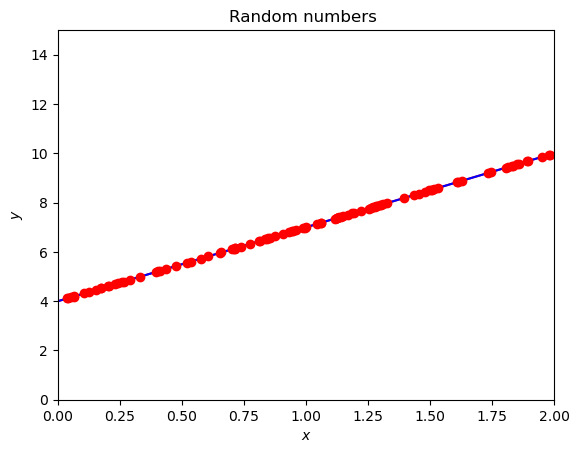

In [8]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x#+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Replace or not

In the above code, we have use replacement in setting up the
mini-batches. The discussion
[here](https://sebastianraschka.com/faq/docs/sgd-methods.html) may be
useful.

## Momentum based GD

The stochastic gradient descent (SGD) is almost always used with a
*momentum* or inertia term that serves as a memory of the direction we
are moving in parameter space.  This is typically implemented as
follows

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t},
\label{_auto3} \tag{14}
\end{equation}
$$

where we have introduced a momentum parameter $\gamma$, with
$0\le\gamma\le 1$, and for brevity we dropped the explicit notation to
indicate the gradient is to be taken over a different mini-batch at
each step. We call this algorithm gradient descent with momentum
(GDM). From these equations, it is clear that $\mathbf{v}_t$ is a
running average of recently encountered gradients and
$(1-\gamma)^{-1}$ sets the characteristic time scale for the memory
used in the averaging procedure. Consistent with this, when
$\gamma=0$, this just reduces down to ordinary SGD as discussed
earlier. An equivalent way of writing the updates is

$$
\Delta \boldsymbol{\theta}_{t+1} = \gamma \Delta \boldsymbol{\theta}_t -\ \eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t),
$$

where we have defined $\Delta \boldsymbol{\theta}_{t}= \boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1}$.

## More on momentum based approaches

Let us try to get more intuition from these equations. It is helpful
to consider a simple physical analogy with a particle of mass $m$
moving in a viscous medium with drag coefficient $\mu$ and potential
$E(\mathbf{w})$. If we denote the particle's position by $\mathbf{w}$,
then its motion is described by

$$
m {d^2 \mathbf{w} \over dt^2} + \mu {d \mathbf{w} \over dt }= -\nabla_w E(\mathbf{w}).
$$

We can discretize this equation in the usual way to get

$$
m { \mathbf{w}_{t+\Delta t}-2 \mathbf{w}_{t} +\mathbf{w}_{t-\Delta t} \over (\Delta t)^2}+\mu {\mathbf{w}_{t+\Delta t}- \mathbf{w}_{t} \over \Delta t} = -\nabla_w E(\mathbf{w}).
$$

Rearranging this equation, we can rewrite this as

$$
\Delta \mathbf{w}_{t +\Delta t}= - { (\Delta t)^2 \over m +\mu \Delta t} \nabla_w E(\mathbf{w})+ {m \over m +\mu \Delta t} \Delta \mathbf{w}_t.
$$

## Momentum parameter

Notice that this equation is identical to previous one if we identify
the position of the particle, $\mathbf{w}$, with the parameters
$\boldsymbol{\theta}$. This allows us to identify the momentum
parameter and learning rate with the mass of the particle and the
viscous drag as:

$$
\gamma= {m \over m +\mu \Delta t }, \qquad \eta = {(\Delta t)^2 \over m +\mu \Delta t}.
$$

Thus, as the name suggests, the momentum parameter is proportional to
the mass of the particle and effectively provides inertia.
Furthermore, in the large viscosity/small learning rate limit, our
memory time scales as $(1-\gamma)^{-1} \approx m/(\mu \Delta t)$.

Why is momentum useful? SGD momentum helps the gradient descent
algorithm gain speed in directions with persistent but small gradients
even in the presence of stochasticity, while suppressing oscillations
in high-curvature directions. This becomes especially important in
situations where the landscape is shallow and flat in some directions
and narrow and steep in others. It has been argued that first-order
methods (with appropriate initial conditions) can perform comparable
to more expensive second order methods, especially in the context of
complex deep learning models.

These beneficial properties of momentum can sometimes become even more
pronounced by using a slight modification of the classical momentum
algorithm called Nesterov Accelerated Gradient (NAG).

In the NAG algorithm, rather than calculating the gradient at the
current parameters, $\nabla_\theta E(\boldsymbol{\theta}_t)$, one
calculates the gradient at the expected value of the parameters given
our current momentum, $\nabla_\theta E(\boldsymbol{\theta}_t +\gamma
\mathbf{v}_{t-1})$. This yields the NAG update rule

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t +\gamma \mathbf{v}_{t-1}) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t}.
\label{_auto4} \tag{15}
\end{equation}
$$

One of the major advantages of NAG is that it allows for the use of a larger learning rate than GDM for the same choice of $\gamma$.

## Second moment of the gradient

In stochastic gradient descent, with and without momentum, we still
have to specify a schedule for tuning the learning rates $\eta_t$
as a function of time.  As discussed in the context of Newton's
method, this presents a number of dilemmas. The learning rate is
limited by the steepest direction which can change depending on the
current position in the landscape. To circumvent this problem, ideally
our algorithm would keep track of curvature and take large steps in
shallow, flat directions and small steps in steep, narrow directions.
Second-order methods accomplish this by calculating or approximating
the Hessian and normalizing the learning rate by the
curvature. However, this is very computationally expensive for
extremely large models. Ideally, we would like to be able to
adaptively change the step size to match the landscape without paying
the steep computational price of calculating or approximating
Hessians.

Recently, a number of methods have been introduced that accomplish
this by tracking not only the gradient, but also the second moment of
the gradient. These methods include AdaGrad, AdaDelta, Root Mean Squared Propagation (RMS-Prop), and
[ADAM](https://arxiv.org/abs/1412.6980).

## RMS prop

In RMS prop, in addition to keeping a running average of the first
moment of the gradient, we also keep track of the second moment
denoted by $\mathbf{s}_t=\mathbb{E}[\mathbf{g}_t^2]$. The update rule
for RMS prop is given by

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto5} \tag{16}
\end{equation}
$$

$$
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber
$$

where $\beta$ controls the averaging time of the second moment and is
typically taken to be about $\beta=0.9$, $\eta_t$ is a learning rate
typically chosen to be $10^{-3}$, and $\epsilon\sim 10^{-8} $ is a
small regularization constant to prevent divergences. Multiplication
and division by vectors is understood as an element-wise operation. It
is clear from this formula that the learning rate is reduced in
directions where the norm of the gradient is consistently large. This
greatly speeds up the convergence by allowing us to use a larger
learning rate for flat directions.

## [ADAM optimizer](https://arxiv.org/abs/1412.6980)

A related algorithm is the ADAM optimizer. In
[ADAM](https://arxiv.org/abs/1412.6980), we keep a running average of
both the first and second moment of the gradient and use this
information to adaptively change the learning rate for different
parameters.  The method isefficient when working with large
problems involving lots data and/or parameters.  It is a combination of the
gradient descent with momentum algorithm and the RMSprop algorithm
discussed above.

In addition to keeping a running average of the first and
second moments of the gradient
(i.e. $\mathbf{m}_t=\mathbb{E}[\mathbf{g}_t]$ and
$\mathbf{s}_t=\mathbb{E}[\mathbf{g}^2_t]$, respectively), ADAM
performs an additional bias correction to account for the fact that we
are estimating the first two moments of the gradient using a running
average (denoted by the hats in the update rule below). The update
rule for ADAM is given by (where multiplication and division are once
again understood to be element-wise operations below)

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto6} \tag{17}
\end{equation}
$$

$$
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber
$$

$$
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1^t} \nonumber
$$

$$
\boldsymbol{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2^t} \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \boldsymbol{\mathbf{m}}_t \over \sqrt{\boldsymbol{\mathbf{s}}_t} +\epsilon}, \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation} 
\label{_auto7} \tag{18}
\end{equation}
$$

where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and
second moment and are typically taken to be $0.9$ and $0.99$
respectively, and $\eta$ and $\epsilon$ are identical to RMSprop.

Like in RMSprop, the effective step size of a parameter depends on the
magnitude of its gradient squared.  To understand this better, let us
rewrite this expression in terms of the variance
$\boldsymbol{\sigma}_t^2 = \boldsymbol{\mathbf{s}}_t -
(\boldsymbol{\mathbf{m}}_t)^2$. Consider a single parameter $\theta_t$. The
update rule for this parameter is given by

$$
\Delta \theta_{t+1}= -\eta_t { \boldsymbol{m}_t \over \sqrt{\sigma_t^2 +  m_t^2 }+\epsilon}.
$$

## Algorithms and codes for Adagrad, RMSprop and Adam

The algorithms we have implemented are well described in the text by [Goodfellow, Bengio and Courville, chapter 8](https://www.deeplearningbook.org/contents/optimization.html).

The codes which implement these algorithms are discussed after our presentation of automatic differentiation.

## Practical tips

* **Randomize the data when making mini-batches**. It is always important to randomly shuffle the data when forming mini-batches. Otherwise, the gradient descent method can fit spurious correlations resulting from the order in which data is presented.

* **Transform your inputs**. Learning becomes difficult when our landscape has a mixture of steep and flat directions. One simple trick for minimizing these situations is to standardize the data by subtracting the mean and normalizing the variance of input variables. Whenever possible, also decorrelate the inputs. To understand why this is helpful, consider the case of linear regression. It is easy to show that for the squared error cost function, the Hessian of the cost function is just the correlation matrix between the inputs. Thus, by standardizing the inputs, we are ensuring that the landscape looks homogeneous in all directions in parameter space. Since most deep networks can be viewed as linear transformations followed by a non-linearity at each layer, we expect this intuition to hold beyond the linear case.

* **Monitor the out-of-sample performance.** Always monitor the performance of your model on a validation set (a small portion of the training data that is held out of the training process to serve as a proxy for the test set. If the validation error starts increasing, then the model is beginning to overfit. Terminate the learning process. This *early stopping* significantly improves performance in many settings.

* **Adaptive optimization methods don't always have good generalization.** Recent studies have shown that adaptive methods such as ADAM, RMSPorp, and AdaGrad tend to have poor generalization compared to SGD or SGD with momentum, particularly in the high-dimensional limit (i.e. the number of parameters exceeds the number of data points). Although it is not clear at this stage why these methods perform so well in training deep neural networks, simpler procedures like properly-tuned SGD may work as well or better in these applications.

Geron's text, see chapter 11, has several interesting discussions.

## Automatic differentiation

[Automatic differentiation (AD)](https://en.wikipedia.org/wiki/Automatic_differentiation), 
also called algorithmic
differentiation or computational differentiation,is a set of
techniques to numerically evaluate the derivative of a function
specified by a computer program. AD exploits the fact that every
computer program, no matter how complicated, executes a sequence of
elementary arithmetic operations (addition, subtraction,
multiplication, division, etc.) and elementary functions (exp, log,
sin, cos, etc.). By applying the chain rule repeatedly to these
operations, derivatives of arbitrary order can be computed
automatically, accurately to working precision, and using at most a
small constant factor more arithmetic operations than the original
program.

Automatic differentiation is neither:

* Symbolic differentiation, nor

* Numerical differentiation (the method of finite differences).

Symbolic differentiation can lead to inefficient code and faces the
difficulty of converting a computer program into a single expression,
while numerical differentiation can introduce round-off errors in the
discretization process and cancellation

Python has tools for so-called **automatic differentiation**.
Consider the following example

$$
f(x) = \sin\left(2\pi x + x^2\right)
$$

which has the following derivative

$$
f'(x) = \cos\left(2\pi x + x^2\right)\left(2\pi + 2x\right)
$$

Using **autograd** we have

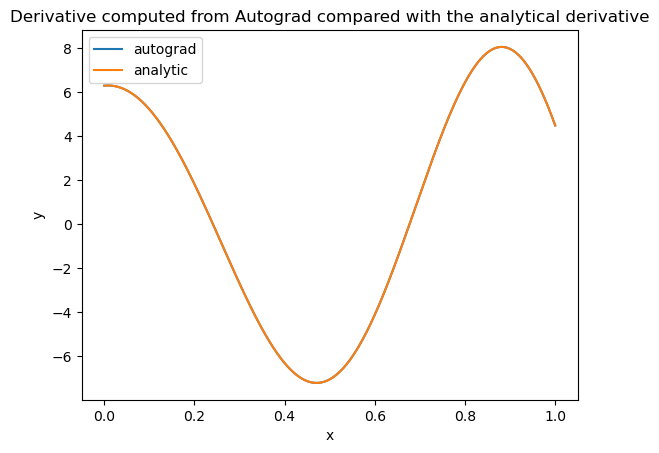

The max absolute difference is: 1.77636e-15


In [9]:
import autograd.numpy as np

# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 

# To plot:
import matplotlib.pyplot as plt 


def f(x):
    return np.sin(2*np.pi*x + x**2)

def f_grad_analytic(x):
    return np.cos(2*np.pi*x + x**2)*(2*np.pi + 2*x)

# Do the comparison:
x = np.linspace(0,1,1000)

f_grad = egrad(f)

computed = f_grad(x)
analytic = f_grad_analytic(x)

plt.title('Derivative computed from Autograd compared with the analytical derivative')
plt.plot(x,computed,label='autograd')
plt.plot(x,analytic,label='analytic')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("The max absolute difference is: %g"%(np.max(np.abs(computed - analytic))))

## Using autograd

Here we
experiment with what kind of functions Autograd is capable
of finding the gradient of. The following Python functions are just
meant to illustrate what Autograd can do, but please feel free to
experiment with other, possibly more complicated, functions as well.

In [10]:
import autograd.numpy as np
from autograd import grad

def f1(x):
    return x**3 + 1

f1_grad = grad(f1)

# Remember to send in float as argument to the computed gradient from Autograd!
a = 1.0

# See the evaluated gradient at a using autograd:
print("The gradient of f1 evaluated at a = %g using autograd is: %g"%(a,f1_grad(a)))

# Compare with the analytical derivative, that is f1'(x) = 3*x**2 
grad_analytical = 3*a**2
print("The gradient of f1 evaluated at a = %g by finding the analytic expression is: %g"%(a,grad_analytical))

The gradient of f1 evaluated at a = 1 using autograd is: 3
The gradient of f1 evaluated at a = 1 by finding the analytic expression is: 3


## Autograd with more complicated functions

To differentiate with respect to two (or more) arguments of a Python
function, Autograd need to know at which variable the function if
being differentiated with respect to.

In [16]:
import autograd.numpy as np
from autograd import grad
def f2(x1,x2):
    return 3*x1**3 + x2*(x1 - 5) + 1

# By sending the argument 0, Autograd will compute the derivative w.r.t the first variable, in this case x1
f2_grad_x1 = grad(f2,0)

# ... and differentiate w.r.t x2 by sending 1 as an additional arugment to grad
f2_grad_x2 = grad(f2,1)

x1 = 1.0
x2 = 3.0 

print("Evaluating at x1 = %g, x2 = %g"%(x1,x2))
print("-"*30)

# Compare with the analytical derivatives:

# Derivative of f2 w.r.t x1 is: 9*x1**2 + x2:
f2_grad_x1_analytical = 9*x1**2 + x2

# Derivative of f2 w.r.t x2 is: x1 - 5:
f2_grad_x2_analytical = x1 - 5

# See the evaluated derivations:
print("The derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))
print("The analytical derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))

print()

print("The derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))
print("The analytical derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))

Note that the grad function will not produce the true gradient of the function. The true gradient of a function with two or more variables will produce a vector, where each element is the function differentiated w.r.t a variable.

## More complicated functions using the elements of their arguments directly

In [17]:
import autograd.numpy as np
from autograd import grad
def f3(x): # Assumes x is an array of length 5 or higher
    return 2*x[0] + 3*x[1] + 5*x[2] + 7*x[3] + 11*x[4]**2

f3_grad = grad(f3)

x = np.linspace(0,4,5)

# Print the computed gradient:
print("The computed gradient of f3 is: ", f3_grad(x))

# The analytical gradient is: (2, 3, 5, 7, 22*x[4])
f3_grad_analytical = np.array([2, 3, 5, 7, 22*x[4]])

# Print the analytical gradient:
print("The analytical gradient of f3 is: ", f3_grad_analytical)

Note that in this case, when sending an array as input argument, the
output from Autograd is another array. This is the true gradient of
the function, as opposed to the function in the previous example. By
using arrays to represent the variables, the output from Autograd
might be easier to work with, as the output is closer to what one
could expect form a gradient-evaluting function.

## Functions using mathematical functions from Numpy

In [18]:
import autograd.numpy as np
from autograd import grad
def f4(x):
    return np.sqrt(1+x**2) + np.exp(x) + np.sin(2*np.pi*x)

f4_grad = grad(f4)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f4 at x = %g is: %g"%(x,f4_grad(x)))

# The analytical derivative is: x/sqrt(1 + x**2) + exp(x) + cos(2*pi*x)*2*pi
f4_grad_analytical = x/np.sqrt(1 + x**2) + np.exp(x) + np.cos(2*np.pi*x)*2*np.pi

# Print the analytical gradient:
print("The analytical gradient of f4 at x = %g is: %g"%(x,f4_grad_analytical))

## More autograd

In [19]:
import autograd.numpy as np
from autograd import grad
def f5(x):
    if x >= 0:
        return x**2
    else:
        return -3*x + 1

f5_grad = grad(f5)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f5 at x = %g is: %g"%(x,f5_grad(x)))

## And  with loops

In [20]:
import autograd.numpy as np
from autograd import grad
def f6_for(x):
    val = 0
    for i in range(10):
        val = val + x**i
    return val

def f6_while(x):
    val = 0
    i = 0
    while i < 10:
        val = val + x**i
        i = i + 1
    return val

f6_for_grad = grad(f6_for)
f6_while_grad = grad(f6_while)

x = 0.5

# Print the computed derivaties of f6_for and f6_while
print("The computed derivative of f6_for at x = %g is: %g"%(x,f6_for_grad(x)))
print("The computed derivative of f6_while at x = %g is: %g"%(x,f6_while_grad(x)))

In [21]:
import autograd.numpy as np
from autograd import grad
# Both of the functions are implementation of the sum: sum(x**i) for i = 0, ..., 9
# The analytical derivative is: sum(i*x**(i-1)) 
f6_grad_analytical = 0
for i in range(10):
    f6_grad_analytical += i*x**(i-1)

print("The analytical derivative of f6 at x = %g is: %g"%(x,f6_grad_analytical))

## Using recursion

In [22]:
import autograd.numpy as np
from autograd import grad

def f7(n): # Assume that n is an integer
    if n == 1 or n == 0:
        return 1
    else:
        return n*f7(n-1)

f7_grad = grad(f7)

n = 2.0

print("The computed derivative of f7 at n = %d is: %g"%(n,f7_grad(n)))

# The function f7 is an implementation of the factorial of n.
# By using the product rule, one can find that the derivative is:

f7_grad_analytical = 0
for i in range(int(n)-1):
    tmp = 1
    for k in range(int(n)-1):
        if k != i:
            tmp *= (n - k)
    f7_grad_analytical += tmp

print("The analytical derivative of f7 at n = %d is: %g"%(n,f7_grad_analytical))

Note that if n is equal to zero or one, Autograd will give an error message. This message appears when the output is independent on input.

## Unsupported functions
Autograd supports many features. However, there are some functions that is not supported (yet) by Autograd.

Assigning a value to the variable being differentiated with respect to

In [23]:
import autograd.numpy as np
from autograd import grad
def f8(x): # Assume x is an array
    x[2] = 3
    return x*2

f8_grad = grad(f8)

x = 8.4

print("The derivative of f8 is:",f8_grad(x))

Here, Autograd tells us that an 'ArrayBox' does not support item assignment. The item assignment is done when the program tries to assign x[2] to the value 3. However, Autograd has implemented the computation of the derivative such that this assignment is not possible.

## The syntax a.dot(b) when finding the dot product

In [24]:
import autograd.numpy as np
from autograd import grad
def f9(a): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return a.dot(b)

f9_grad = grad(f9)

x = np.array([1.0,0.0])

print("The derivative of f9 is:",f9_grad(x))

Here we are told that the 'dot' function does not belong to Autograd's
version of a Numpy array.  To overcome this, an alternative syntax
which also computed the dot product can be used:

In [25]:
import autograd.numpy as np
from autograd import grad
def f9_alternative(x): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return np.dot(x,b) # The same as x_1*b_1 + x_2*b_2

f9_alternative_grad = grad(f9_alternative)

x = np.array([3.0,0.0])

print("The gradient of f9 is:",f9_alternative_grad(x))

# The analytical gradient of the dot product of vectors x and b with two elements (x_1,x_2) and (b_1, b_2) respectively
# w.r.t x is (b_1, b_2).

## Recommended to avoid
The documentation recommends to avoid inplace operations such as

In [26]:
a += b
a -= b
a*= b
a /=b

## Using Autograd with OLS

We conclude the part on optmization by showing how we can make codes
for linear regression and logistic regression using **autograd**. The
first example shows results with ordinary leats squares.

Own inversion
[[4.07174682]
 [2.74943051]]
Eigenvalues of Hessian Matrix:[0.29640946 4.55171373]
theta from own gd
[[4.07174682]
 [2.74943051]]


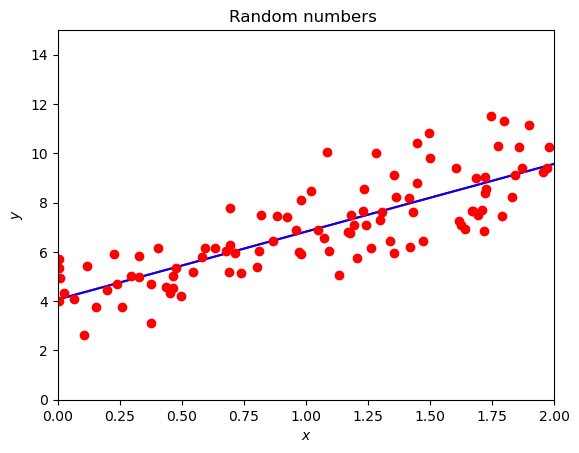

In [11]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000
# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Same code but now with momentum gradient descent

In [12]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x#+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 30

# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
    print(iter,gradients[0],gradients[1])
print("theta from own gd")
print(theta)

# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.3
for iter in range(Niterations):
    # calculate gradient
    gradients = training_gradient(theta)
    # calculate update
    new_change = eta*gradients+delta_momentum*change
    # take a step
    theta -= new_change
    # save the change
    change = new_change
    print(iter,gradients[0],gradients[1])
print("theta from own gd wth momentum")
print(theta)

Own inversion
[[4.]
 [3.]]
Eigenvalues of Hessian Matrix:[0.35029385 4.35082197]
0 [-7.44140301] [-8.31792823]
1 [-0.25578364] [0.21427238]
2 [-0.23518996] [0.19702086]
3 [-0.21625432] [0.18115829]
4 [-0.19884323] [0.16657286]
5 [-0.18283394] [0.15316173]
6 [-0.1681136] [0.14083035]
7 [-0.15457842] [0.1294918]
8 [-0.14213298] [0.11906615]
9 [-0.13068956] [0.10947988]
10 [-0.12016747] [0.10066542]
11 [-0.11049253] [0.09256064]
12 [-0.10159654] [0.08510839]
13 [-0.09341679] [0.07825613]
14 [-0.08589561] [0.07195556]
15 [-0.07897997] [0.06616227]
16 [-0.07262113] [0.06083541]
17 [-0.06677425] [0.05593742]
18 [-0.06139811] [0.05143378]
19 [-0.05645482] [0.04729274]
20 [-0.05190952] [0.0434851]
21 [-0.04773018] [0.03998402]
22 [-0.04388732] [0.03676483]
23 [-0.04035386] [0.03380481]
24 [-0.03710489] [0.03108311]
25 [-0.03411749] [0.02858055]
26 [-0.03137062] [0.02627947]
27 [-0.02884491] [0.02416365]
28 [-0.02652254] [0.02221819]
29 [-0.02438716] [0.02042935]
theta from own gd
[[3.93598604]

## But noen of these can compete with Newton's method

In [13]:
# Using Newton's method
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
beta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(beta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
# Note that here the Hessian does not depend on the parameters beta
invH = np.linalg.pinv(H)
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta = np.random.randn(2,1)
Niterations = 5

# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(beta)
    beta -= invH @ gradients
    print(iter,gradients[0],gradients[1])
print("beta from own Newton code")
print(beta)

Own inversion
[[3.72185791]
 [3.2670743 ]]
Eigenvalues of Hessian Matrix:[0.23371414 4.48219876]
0 [-15.60314174] [-18.43476798]
1 [6.95797586e-15] [4.64130762e-15]
2 [-5.2388649e-16] [-7.36880131e-16]
3 [3.08780779e-16] [4.87834643e-16]
4 [-5.2388649e-16] [-7.36880131e-16]
beta from own Newton code
[[3.72185791]
 [3.2670743 ]]


## Including Stochastic Gradient Descent with Autograd
In this code we include the stochastic gradient descent approach discussed above. Note here that we specify which argument we are taking the derivative with respect to when using **autograd**.

In [30]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

## Same code but now with momentum gradient descent

In [31]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 100

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

change = 0.0
delta_momentum = 0.3

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        # calculate update
        new_change = eta*gradients+delta_momentum*change
        # take a step
        theta -= new_change
        # save the change
        change = new_change
print("theta from own sdg with momentum")
print(theta)

## Similar (second order function now) problem but now with AdaGrad

In [32]:
# Using Autograd to calculate gradients using AdaGrad and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    # The outer product is calculated from scratch for each epoch
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Calculate the outer product of the gradients
        Giter +=gradients @ gradients.T
	# Simpler algorithm with only diagonal elements
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
        # compute update
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own AdaGrad")
print(theta)

Running this code we note an almost perfect agreement with the results from matrix inversion.

## RMSprop for adaptive learning rate with Stochastic Gradient Descent

In [33]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Previous value for the outer product of gradients
        Previous = Giter
	# Accumulated gradient
        Giter +=gradients @ gradients.T
	# Scaling with rho the new and the previous results
        Gnew = (rho*Previous+(1-rho)*Giter)
	# Taking the diagonal only and inverting
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
	# Hadamard product
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own RMSprop")
print(theta)

## And Logistic Regression

In [34]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))

## Introducing [JAX](https://jax.readthedocs.io/en/latest/)

Presently, instead of using **autograd**, we recommend using [JAX](https://jax.readthedocs.io/en/latest/)

**JAX** is Autograd and [XLA (Accelerated Linear Algebra))](https://www.tensorflow.org/xla),
brought together for high-performance numerical computing and machine learning research.
It provides composable transformations of Python+NumPy programs: differentiate, vectorize, parallelize, Just-In-Time compile to GPU/TPU, and more.

Here's a simple example on how you can use **JAX** to compute the derivate of the logistic function.

In [35]:
import jax.numpy as jnp
from jax import grad, jit, vmap

def sum_logistic(x):
  return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))

# Boltzmann Machines

* A generative model can learn to represent and sample from a probability distribution. The core idea is to learn a parametric model of the probability distribution from which the training data was drawn. As an example

a. A model for images could learn to draw new examples of cats and dogs, given a training dataset of images of cats and dogs.

b. Generate a sample of an ordered or disordered Ising model phase, having been given samples of such phases.

c. Model the trial function for Monte Carlo calculations

4. Both use gradient-descent based learning procedures for minimizing cost functions

5. Energy based models don't use backpropagation and automatic differentiation for computing gradients, instead turning to Markov Chain Monte Carlo methods.

6. DNNs often have several hidden layers. A restricted Boltzmann machine has only one hidden layer, however several RBMs can be stacked to make up Deep Belief Networks, of which they constitute the building blocks.

History: The RBM was developed by amongst others Geoffrey Hinton, called by some the "Godfather of Deep Learning", working with the University of Toronto and Google.

A BM is what we would call an undirected probabilistic graphical model
with stochastic continuous or discrete units.

It is interpreted as a stochastic recurrent neural network where the
state of each unit(neurons/nodes) depends on the units it is connected
to. The weights in the network represent thus the strength of the
interaction between various units/nodes.

It turns into a Hopfield network if we choose deterministic rather
than stochastic units. In contrast to a Hopfield network, a BM is a
so-called generative model. It allows us to generate new samples from
the learned distribution.

A standard BM network is divided into a set of observable and visible units $\hat{x}$ and a set of unknown hidden units/nodes $\hat{h}$.

Additionally there can be bias nodes for the hidden and visible layers. These biases are normally set to $1$.

BMs are stackable, meaning they cwe can train a BM which serves as input to another BM. We can construct deep networks for learning complex PDFs. The layers can be trained one after another, a feature which makes them popular in deep learning

However, they are often hard to train. This leads to the introduction of so-called restricted BMs, or RBMS.
Here we take away all lateral connections between nodes in the visible layer as well as connections between nodes in the hidden layer.

## The network

**The network layers**:
1. A function $\mathbf{x}$ that represents the visible layer, a vector of $M$ elements (nodes). This layer represents both what the RBM might be given as training input, and what we want it to be able to reconstruct. This might for example be the pixels of an image, the spin values of the Ising model, or coefficients representing speech.

2. The function $\mathbf{h}$ represents the hidden, or latent, layer. A vector of $N$ elements (nodes). Also called "feature detectors".

The goal of the hidden layer is to increase the model's expressive power. We encode complex interactions between visible variables by introducing additional, hidden variables that interact with visible degrees of freedom in a simple manner, yet still reproduce the complex correlations between visible degrees in the data once marginalized over (integrated out).

Examples of this trick being employed in physics: 
1. The Hubbard-Stratonovich transformation

2. The introduction of ghost fields in gauge theory

3. Shadow wave functions in Quantum Monte Carlo simulations

**The network parameters, to be optimized/learned**:
1. $\mathbf{a}$ represents the visible bias, a vector of same length as $\mathbf{x}$.

2. $\mathbf{b}$ represents the hidden bias, a vector of same lenght as $\mathbf{h}$.

3. $W$ represents the interaction weights, a matrix of size $M\times N$.

### Joint distribution

The restricted Boltzmann machine is described by a Bolztmann distribution

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
	P_{rbm}(\mathbf{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})},
\label{_auto8} \tag{19}
\end{equation}
$$

where $Z$ is the normalization constant or partition function, defined as

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
	Z = \int \int e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})} d\mathbf{x} d\mathbf{h}.
\label{_auto9} \tag{20}
\end{equation}
$$

It is common to ignore $T_0$ by setting it to one.

### Network Elements, the energy function

The function $E(\mathbf{x},\mathbf{h})$ gives the **energy** of a
configuration (pair of vectors) $(\mathbf{x}, \mathbf{h})$. The lower
the energy of a configuration, the higher the probability of it. This
function also depends on the parameters $\mathbf{a}$, $\mathbf{b}$ and
$W$. Thus, when we adjust them during the learning procedure, we are
adjusting the energy function to best fit our problem.

### Defining different types of RBMs

There are different variants of RBMs, and the differences lie in the types of visible and hidden units we choose as well as in the implementation of the energy function $E(\mathbf{x},\mathbf{h})$. The connection between the nodes in the two layers is given by the weights $w_{ij}$. 

**Binary-Binary RBM:**

RBMs were first developed using binary units in both the visible and hidden layer. The corresponding energy function is defined as follows:

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
	E(\mathbf{x}, \mathbf{h}) = - \sum_i^M x_i a_i- \sum_j^N b_j h_j - \sum_{i,j}^{M,N} x_i w_{ij} h_j,
\label{_auto10} \tag{21}
\end{equation}
$$

where the binary values taken on by the nodes are most commonly 0 and 1.

**Gaussian-Binary RBM:**

Another varient is the RBM where the visible units are Gaussian while the hidden units remain binary:

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
	E(\mathbf{x}, \mathbf{h}) = \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2} - \sum_j^N b_j h_j - \sum_{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2}. 
\label{_auto11} \tag{22}
\end{equation}
$$

1. RBMs are Useful when we model continuous data (i.e., we wish $\mathbf{x}$ to be continuous)

2. Requires a smaller learning rate, since there's no upper bound to the value a component might take in the reconstruction

Other types of units include:
1. Softmax and multinomial units

2. Gaussian visible and hidden units

3. Binomial units

4. Rectified linear units

## RBMs for the quantum many body problem

The idea of applying RBMs to quantum many body problems was presented by G. Carleo and M. Troyer, working with ETH Zurich and Microsoft Research.

Some of their motivation included

* The wave function $\Psi$ is a monolithic mathematical quantity that contains all the information on a quantum state, be it a single particle or a complex molecule. In principle, an exponential amount of information is needed to fully encode a generic many-body quantum state.

* There are still interesting open problems, including fundamental questions ranging from the dynamical properties of high-dimensional systems to the exact ground-state properties of strongly interacting fermions.

* The difficulty lies in finding a general strategy to reduce the exponential complexity of the full many-body wave function down to its most essential features. That is

a. Dimensional reduction

b. Feature extraction

* Among the most successful techniques to attack these challenges, artifical neural networks play a prominent role.

* Want to understand whether an artifical neural network may adapt to describe a quantum system.

Carleo and Troyer applied the RBM to the quantum mechanical spin lattice systems of the Ising model and Heisenberg model, with encouraging results. Our goal is to test the method on systems of moving particles. For the spin lattice systems it was natural to use a binary-binary RBM, with the nodes taking values of 1 and -1. For moving particles, on the other hand, we want the visible nodes to be continuous, representing position coordinates. Thus, we start by choosing a Gaussian-binary RBM, where the visible nodes are continuous and hidden nodes take on values of 0 or 1. If eventually we would like the hidden nodes to be continuous as well the rectified linear units seem like the most relevant choice.

## Representing the wave function

The wavefunction should be a probability amplitude depending on
 $\boldsymbol{x}$. The RBM model is given by the joint distribution of
 $\boldsymbol{x}$ and $\boldsymbol{h}$

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
        F_{rbm}(\mathbf{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})}.
\label{_auto12} \tag{23}
\end{equation}
$$

To find the marginal distribution of $\boldsymbol{x}$ we set:

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
        F_{rbm}(\mathbf{x}) = \sum_\mathbf{h} F_{rbm}(\mathbf{x}, \mathbf{h}) 
\label{_auto13} \tag{24}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation} 
                                = \frac{1}{Z}\sum_\mathbf{h} e^{-E(\mathbf{x}, \mathbf{h})}.
\label{_auto14} \tag{25}
\end{equation}
$$

Now this is what we use to represent the wave function, calling it a neural-network quantum state (NQS)

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
        \Psi (\mathbf{X}) = F_{rbm}(\mathbf{x}) 
\label{_auto15} \tag{26}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation} 
        = \frac{1}{Z}\sum_{\boldsymbol{h}} e^{-E(\mathbf{x}, \mathbf{h})} 
\label{_auto16} \tag{27}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation} 
        = \frac{1}{Z} \sum_{\{h_j\}} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2} + \sum_j^N b_j h_j + \sum_\
{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma^2}} 
\label{_auto17} \tag{28}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation} 
        = \frac{1}{Z} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2}} \prod_j^N (1 + e^{b_j + \sum_i^M \frac{x\
_i w_{ij}}{\sigma^2}}). 
\label{_auto18} \tag{29}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation} 
\label{_auto19} \tag{30}
\end{equation}
$$

## Choose the cost function

Now we don't necessarily have training data (unless we generate it by using some other method). However, what we do have is the variational principle which allows us to obtain the ground state wave function by minimizing the expectation value of the energy of a trial wavefunction (corresponding to the untrained NQS). Similarly to the traditional variational Monte Carlo method then, it is the local energy we wish to minimize. The gradient to use for the stochastic gradient descent procedure is

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation}
	C_i = \frac{\partial \langle E_L \rangle}{\partial \theta_i}
	= 2(\langle E_L \frac{1}{\Psi}\frac{\partial \Psi}{\partial \theta_i} \rangle - \langle E_L \rangle \langle \frac{1}{\Psi}\frac{\partial \Psi}{\partial \theta_i} \rangle ),
\label{_auto20} \tag{31}
\end{equation}
$$

where the local energy is given by

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation}
	E_L = \frac{1}{\Psi} \hat{\mathbf{H}} \Psi.
\label{_auto21} \tag{32}
\end{equation}
$$

## Neural Quantum States

The wavefunction should be a probability amplitude depending on $\boldsymbol{x}$. The RBM model is given by the joint distribution of $\boldsymbol{x}$ and $\boldsymbol{h}$

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation}
	F_{rbm}(\boldsymbol{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\boldsymbol{x},\mathbf{h})}
\label{_auto22} \tag{33}
\end{equation}
$$

To find the marginal distribution of $\boldsymbol{x}$ we set:

<!-- Equation labels as ordinary links -->
<div id="_auto23"></div>

$$
\begin{equation}
	F_{rbm}(\mathbf{x}) = \sum_\mathbf{h} F_{rbm}(\mathbf{x}, \mathbf{h}) 
\label{_auto23} \tag{34}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation} 
				= \frac{1}{Z}\sum_\mathbf{h} e^{-E(\mathbf{x}, \mathbf{h})}
\label{_auto24} \tag{35}
\end{equation}
$$

Now this is what we use to represent the wave function, calling it a neural-network quantum state (NQS)

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation}
	\Psi (\mathbf{X}) = F_{rbm}(\mathbf{x}) 
\label{_auto25} \tag{36}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation} 
	= \frac{1}{Z}\sum_{\boldsymbol{h}} e^{-E(\mathbf{x}, \mathbf{h})} 
\label{_auto26} \tag{37}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation} 
	= \frac{1}{Z} \sum_{\{h_j\}} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2} + \sum_j^N b_j h_j + \sum_{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma^2}} 
\label{_auto27} \tag{38}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation} 
	= \frac{1}{Z} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2}} \prod_j^N (1 + e^{b_j + \sum_i^M \frac{x_i w_{ij}}{\sigma^2}}) 
\label{_auto28} \tag{39}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation} 
\label{_auto29} \tag{40}
\end{equation}
$$

The above wavefunction is the most general one because it allows for
complex valued wavefunctions. However it fundamentally changes the
probabilistic foundation of the RBM, because what is usually a
probability in the RBM framework is now a an amplitude. This means
that a lot of the theoretical framework usually used to interpret the
model, i.e. graphical models, conditional probabilities, and Markov
random fields, breaks down. If we assume the wavefunction to be
postive definite, however, we can use the RBM to represent the squared
wavefunction, and thereby a probability. This also makes it possible
to sample from the model using Gibbs sampling, because we can obtain
the conditional probabilities.

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation}
	|\Psi (\mathbf{X})|^2 = F_{rbm}(\mathbf{X}) 
\label{_auto30} \tag{41}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation} 
	\Rightarrow \Psi (\mathbf{X}) = \sqrt{F_{rbm}(\mathbf{X})} 
\label{_auto31} \tag{42}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto32"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}}\sqrt{\sum_{\{h_j\}} e^{-E(\mathbf{X}, \mathbf{h})}} 
\label{_auto32} \tag{43}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto33"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} \sqrt{\sum_{\{h_j\}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{2\sigma^2} + \sum_j^N b_j h_j + \sum_{i,j}^{M,N} \frac{X_i w_{ij} h_j}{\sigma^2}} }
\label{_auto33} \tag{44}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto34"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \sqrt{\sum_{\{h_j\}} \prod_j^N e^{b_j h_j + \sum_i^M \frac{X_i w_{ij} h_j}{\sigma^2}}} 
\label{_auto34} \tag{45}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto35"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \sqrt{\prod_j^N \sum_{h_j}  e^{b_j h_j + \sum_i^M \frac{X_i w_{ij} h_j}{\sigma^2}}} 
\label{_auto35} \tag{46}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto36"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \prod_j^N \sqrt{e^0 + e^{b_j + \sum_i^M \frac{X_i w_{ij}}{\sigma^2}}} 
\label{_auto36} \tag{47}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto37"></div>

$$
\begin{equation} 
	= \frac{1}{\sqrt{Z}} e^{-\sum_i^M \frac{(X_i - a_i)^2}{4\sigma^2}} \prod_j^N \sqrt{1 + e^{b_j + \sum_i^M \frac{X_i w_{ij}}{\sigma^2}}} 
\label{_auto37} \tag{48}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto38"></div>

$$
\begin{equation} 
\label{_auto38} \tag{49}
\end{equation}
$$

### Cost function

This is where we deviate from what is common in machine
learning. Rather than defining a cost function based on some dataset,
our cost function is the energy of the quantum mechanical system. From
the variational principle we know that minizing this energy should
lead to the ground state wavefunction. As stated previously the local
energy is given by

<!-- Equation labels as ordinary links -->
<div id="_auto39"></div>

$$
\begin{equation}
	E_L = \frac{1}{\Psi} \hat{\mathbf{H}} \Psi,
\label{_auto39} \tag{50}
\end{equation}
$$

and the gradient is

<!-- Equation labels as ordinary links -->
<div id="_auto40"></div>

$$
\begin{equation}
	G_i = \frac{\partial \langle E_L \rangle}{\partial \alpha_i}
	= 2(\langle E_L \frac{1}{\Psi}\frac{\partial \Psi}{\partial \alpha_i} \rangle - \langle E_L \rangle \langle \frac{1}{\Psi}\frac{\partial \Psi}{\partial \alpha_i} \rangle ),
\label{_auto40} \tag{51}
\end{equation}
$$

where $\alpha_i = a_1,...,a_M,b_1,...,b_N,w_{11},...,w_{MN}$.

We use that $\frac{1}{\Psi}\frac{\partial \Psi}{\partial \alpha_i} 
	= \frac{\partial \ln{\Psi}}{\partial \alpha_i}$,
and find

<!-- Equation labels as ordinary links -->
<div id="_auto41"></div>

$$
\begin{equation}
	\ln{\Psi({\mathbf{X}})} = -\ln{Z} - \sum_m^M \frac{(X_m - a_m)^2}{2\sigma^2}
	+ \sum_n^N \ln({1 + e^{b_n + \sum_i^M \frac{X_i w_{in}}{\sigma^2}})}.
\label{_auto41} \tag{52}
\end{equation}
$$

This gives

<!-- Equation labels as ordinary links -->
<div id="_auto42"></div>

$$
\begin{equation}
	\frac{\partial }{\partial a_m} \ln\Psi
	= 	\frac{1}{\sigma^2} (X_m - a_m) 
\label{_auto42} \tag{53}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto43"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial b_n} \ln\Psi
	=
	\frac{1}{e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1} 
\label{_auto43} \tag{54}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto44"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial w_{mn}} \ln\Psi
	= \frac{X_m}{\sigma^2(e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1)}.
\label{_auto44} \tag{55}
\end{equation}
$$

If $\Psi = \sqrt{F_{rbm}}$ we have

<!-- Equation labels as ordinary links -->
<div id="_auto45"></div>

$$
\begin{equation}
	\ln{\Psi({\mathbf{X}})} = -\frac{1}{2}\ln{Z} - \sum_m^M \frac{(X_m - a_m)^2}{4\sigma^2}
	+ \frac{1}{2}\sum_n^N \ln({1 + e^{b_n + \sum_i^M \frac{X_i w_{in}}{\sigma^2}})},
\label{_auto45} \tag{56}
\end{equation}
$$

which results in

<!-- Equation labels as ordinary links -->
<div id="_auto46"></div>

$$
\begin{equation}
	\frac{\partial }{\partial a_m} \ln\Psi
	= 	\frac{1}{2\sigma^2} (X_m - a_m) 
\label{_auto46} \tag{57}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto47"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial b_n} \ln\Psi
	=
	\frac{1}{2(e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1)} 
\label{_auto47} \tag{58}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto48"></div>

$$
\begin{equation} 
	\frac{\partial }{\partial w_{mn}} \ln\Psi
	= \frac{X_m}{2\sigma^2(e^{-b_n-\frac{1}{\sigma^2}\sum_i^M X_i w_{in}} + 1)}.
\label{_auto48} \tag{59}
\end{equation}
$$

Let us assume again that our Hamiltonian is

<!-- Equation labels as ordinary links -->
<div id="_auto49"></div>

$$
\begin{equation}
	\hat{\mathbf{H}} = \sum_p^P (-\frac{1}{2}\nabla_p^2 + \frac{1}{2}\omega^2 r_p^2 ) + \sum_{p<q} \frac{1}{r_{pq}},
\label{_auto49} \tag{60}
\end{equation}
$$

where the first summation term represents the standard harmonic
oscillator part and the latter the repulsive interaction between two
electrons. Natural units ($\hbar=c=e=m_e=1$) are used, and $P$ is the
number of particles. This gives us the following expression for the
local energy ($D$ being the number of dimensions)

<!-- Equation labels as ordinary links -->
<div id="_auto50"></div>

$$
\begin{equation}
	E_L = \frac{1}{\Psi} \mathbf{H} \Psi 
\label{_auto50} \tag{61}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto51"></div>

$$
\begin{equation} 
	= \frac{1}{\Psi} (\sum_p^P (-\frac{1}{2}\nabla_p^2 + \frac{1}{2}\omega^2 r_p^2 ) + \sum_{p<q} \frac{1}{r_{pq}}) \Psi 
\label{_auto51} \tag{62}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto52"></div>

$$
\begin{equation} 
	= -\frac{1}{2}\frac{1}{\Psi} \sum_p^P \nabla_p^2 \Psi 
	+ \frac{1}{2}\omega^2 \sum_p^P  r_p^2  + \sum_{p<q} \frac{1}{r_{pq}} 
\label{_auto52} \tag{63}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto53"></div>

$$
\begin{equation} 
	= -\frac{1}{2}\frac{1}{\Psi} \sum_p^P \sum_d^D \frac{\partial^2 \Psi}{\partial x_{pd}^2} + \frac{1}{2}\omega^2 \sum_p^P  r_p^2  + \sum_{p<q} \frac{1}{r_{pq}} 
\label{_auto53} \tag{64}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto54"></div>

$$
\begin{equation} 
	= \frac{1}{2} \sum_p^P \sum_d^D (-(\frac{\partial}{\partial x_{pd}} \ln\Psi)^2 -\frac{\partial^2}{\partial x_{pd}^2} \ln\Psi + \omega^2 x_{pd}^2)  + \sum_{p<q} \frac{1}{r_{pq}}. 
\label{_auto54} \tag{65}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto55"></div>

$$
\begin{equation} 
\label{_auto55} \tag{66}
\end{equation}
$$

Letting each visible node in the Boltzmann machine 
represent one coordinate of one particle, we obtain

<!-- Equation labels as ordinary links -->
<div id="_auto56"></div>

$$
\begin{equation}
	E_L =
	\frac{1}{2} \sum_m^M (-(\frac{\partial}{\partial v_m} \ln\Psi)^2 -\frac{\partial^2}{\partial v_m^2} \ln\Psi + \omega^2 v_m^2)  + \sum_{p<q} \frac{1}{r_{pq}},
\label{_auto56} \tag{67}
\end{equation}
$$

where we have that

<!-- Equation labels as ordinary links -->
<div id="_auto57"></div>

$$
\begin{equation}
	\frac{\partial}{\partial x_m} \ln\Psi
	= - \frac{1}{\sigma^2}(x_m - a_m) + \frac{1}{\sigma^2} \sum_n^N \frac{w_{mn}}{e^{-b_n - \frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1} 
\label{_auto57} \tag{68}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto58"></div>

$$
\begin{equation} 
	\frac{\partial^2}{\partial x_m^2} \ln\Psi
	= - \frac{1}{\sigma^2} + \frac{1}{\sigma^4}\sum_n^N \omega_{mn}^2 \frac{e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}}}{(e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1)^2}.
\label{_auto58} \tag{69}
\end{equation}
$$

We now have all the expressions neeeded to calculate the gradient of
the expected local energy with respect to the RBM parameters
$\frac{\partial \langle E_L \rangle}{\partial \alpha_i}$.

If we use $\Psi = \sqrt{F_{rbm}}$ we obtain

<!-- Equation labels as ordinary links -->
<div id="_auto59"></div>

$$
\begin{equation}
	\frac{\partial}{\partial x_m} \ln\Psi
	= - \frac{1}{2\sigma^2}(x_m - a_m) + \frac{1}{2\sigma^2} \sum_n^N
 	\frac{w_{mn}}{e^{-b_n-\frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1}
	
\label{_auto59} \tag{70}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto60"></div>

$$
\begin{equation} 
	\frac{\partial^2}{\partial x_m^2} \ln\Psi
	= - \frac{1}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_n^N \omega_{mn}^2 \frac{e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}}}{(e^{b_n + \frac{1}{\sigma^2}\sum_i^M x_i w_{in}} + 1)^2}.
\label{_auto60} \tag{71}
\end{equation}
$$

The difference between this equation and the previous one is that we multiply by a factor $1/2$.

## Python version for the two non-interacting particles

In [15]:
# 2-electron VMC code for 2dim quantum dot with importance sampling
# Using gaussian rng for new positions and Metropolis- Hastings 
# Added restricted boltzmann machine method for dealing with the wavefunction
# RBM code based heavily off of:
# https://github.com/CompPhysics/ComputationalPhysics2/tree/gh-pages/doc/Programs/BoltzmannMachines/MLcpp/src/CppCode/ob
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys



# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,a,b,w):
    sigma=1.0
    sig2 = sigma**2
    Psi1 = 0.0
    Psi2 = 1.0
    Q = Qfac(r,b,w)
    
    for iq in range(NumberParticles):
        for ix in range(Dimension):
            Psi1 += (r[iq,ix]-a[iq,ix])**2
            
    for ih in range(NumberHidden):
        Psi2 *= (1.0 + np.exp(Q[ih]))
        
    Psi1 = np.exp(-Psi1/(2*sig2))

    return Psi1*Psi2

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,a,b,w):
    sigma=1.0
    sig2 = sigma**2
    locenergy = 0.0
    
    Q = Qfac(r,b,w)

    for iq in range(NumberParticles):
        for ix in range(Dimension):
            sum1 = 0.0
            sum2 = 0.0
            for ih in range(NumberHidden):
                sum1 += w[iq,ix,ih]/(1+np.exp(-Q[ih]))
                sum2 += w[iq,ix,ih]**2 * np.exp(Q[ih]) / (1.0 + np.exp(Q[ih]))**2
    
            dlnpsi1 = -(r[iq,ix] - a[iq,ix]) /sig2 + sum1/sig2
            dlnpsi2 = -1/sig2 + sum2/sig2**2
            locenergy += 0.5*(-dlnpsi1*dlnpsi1 - dlnpsi2 + r[iq,ix]**2)
            
    if(interaction==True):
        for iq1 in range(NumberParticles):
            for iq2 in range(iq1):
                distance = 0.0
                for ix in range(Dimension):
                    distance += (r[iq1,ix] - r[iq2,ix])**2
                    
                locenergy += 1/sqrt(distance)
                
    return locenergy

# Derivate of wave function ansatz as function of variational parameters
def DerivativeWFansatz(r,a,b,w):
    
    sigma=1.0
    sig2 = sigma**2
    
    Q = Qfac(r,b,w)
    
    WfDer = np.empty((3,),dtype=object)
    WfDer = [np.copy(a),np.copy(b),np.copy(w)]
    
    WfDer[0] = (r-a)/sig2
    WfDer[1] = 1 / (1 + np.exp(-Q))
    
    for ih in range(NumberHidden):
        WfDer[2][:,:,ih] = w[:,:,ih] / (sig2*(1+np.exp(-Q[ih])))
            
    return  WfDer

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,a,b,w):

    sigma=1.0
    sig2 = sigma**2
    
    qforce = np.zeros((NumberParticles,Dimension), np.double)
    sum1 = np.zeros((NumberParticles,Dimension), np.double)
    
    Q = Qfac(r,b,w)
    
    for ih in range(NumberHidden):
        sum1 += w[:,:,ih]/(1+np.exp(-Q[ih]))
    
    qforce = 2*(-(r-a)/sig2 + sum1/sig2)
    
    return qforce
    
def Qfac(r,b,w):
    Q = np.zeros((NumberHidden), np.double)
    temp = np.zeros((NumberHidden), np.double)
    
    for ih in range(NumberHidden):
        temp[ih] = (r*w[:,:,ih]).sum()
        
    Q = b + temp
    
    return Q
    
# Computing the derivative of the energy and the energy 
def EnergyMinimization(a,b,w):

    NumberMCcycles= 10000
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    # seed for rng generator 
    seed()
    energy = 0.0
    DeltaE = 0.0

    EnergyDer = np.empty((3,),dtype=object)
    DeltaPsi = np.empty((3,),dtype=object)
    DerivativePsiE = np.empty((3,),dtype=object)
    EnergyDer = [np.copy(a),np.copy(b),np.copy(w)]
    DeltaPsi = [np.copy(a),np.copy(b),np.copy(w)]
    DerivativePsiE = [np.copy(a),np.copy(b),np.copy(w)]
    for i in range(3): EnergyDer[i].fill(0.0)
    for i in range(3): DeltaPsi[i].fill(0.0)
    for i in range(3): DerivativePsiE[i].fill(0.0)

    
    #Initial position
    for i in range(NumberParticles):
        for j in range(Dimension):
            PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
    wfold = WaveFunction(PositionOld,a,b,w)
    QuantumForceOld = QuantumForce(PositionOld,a,b,w)

    #Loop over MC MCcycles
    for MCcycle in range(NumberMCcycles):
        #Trial position moving one particle at the time
        for i in range(NumberParticles):
            for j in range(Dimension):
                PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                       QuantumForceOld[i,j]*TimeStep*D
            wfnew = WaveFunction(PositionNew,a,b,w)
            QuantumForceNew = QuantumForce(PositionNew,a,b,w)
            
            GreensFunction = 0.0
            for j in range(Dimension):
                GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
                                      (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
            GreensFunction = exp(GreensFunction)
            ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
            #Metropolis-Hastings test to see whether we accept the move
            if random() <= ProbabilityRatio:
                for j in range(Dimension):
                    PositionOld[i,j] = PositionNew[i,j]
                    QuantumForceOld[i,j] = QuantumForceNew[i,j]
                wfold = wfnew
        #print("wf new:        ", wfnew)
        #print("force on 1 new:", QuantumForceNew[0,:])
        #print("pos of 1 new:  ", PositionNew[0,:])
        #print("force on 2 new:", QuantumForceNew[1,:])
        #print("pos of 2 new:  ", PositionNew[1,:])
        DeltaE = LocalEnergy(PositionOld,a,b,w)
        DerPsi = DerivativeWFansatz(PositionOld,a,b,w)
        
        DeltaPsi[0] += DerPsi[0]
        DeltaPsi[1] += DerPsi[1]
        DeltaPsi[2] += DerPsi[2]
        
        energy += DeltaE

        DerivativePsiE[0] += DerPsi[0]*DeltaE
        DerivativePsiE[1] += DerPsi[1]*DeltaE
        DerivativePsiE[2] += DerPsi[2]*DeltaE
            
    # We calculate mean values
    energy /= NumberMCcycles
    DerivativePsiE[0] /= NumberMCcycles
    DerivativePsiE[1] /= NumberMCcycles
    DerivativePsiE[2] /= NumberMCcycles
    DeltaPsi[0] /= NumberMCcycles
    DeltaPsi[1] /= NumberMCcycles
    DeltaPsi[2] /= NumberMCcycles
    EnergyDer[0]  = 2*(DerivativePsiE[0]-DeltaPsi[0]*energy)
    EnergyDer[1]  = 2*(DerivativePsiE[1]-DeltaPsi[1]*energy)
    EnergyDer[2]  = 2*(DerivativePsiE[2]-DeltaPsi[2]*energy)
    return energy, EnergyDer


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
NumberHidden = 2

interaction=True

# guess for parameters
a=np.random.normal(loc=0.0, scale=0.001, size=(NumberParticles,Dimension))
b=np.random.normal(loc=0.0, scale=0.001, size=(NumberHidden))
w=np.random.normal(loc=0.0, scale=0.001, size=(NumberParticles,Dimension,NumberHidden))
# Set up iteration using stochastic gradient method
Energy = 0
EDerivative = np.empty((3,),dtype=object)
EDerivative = [np.copy(a),np.copy(b),np.copy(w)]
# Learning rate eta, max iterations, need to change to adaptive learning rate
eta = 0.001
MaxIterations = 50
iter = 0
np.seterr(invalid='raise')
Energies = np.zeros(MaxIterations)
EnergyDerivatives1 = np.zeros(MaxIterations)
EnergyDerivatives2 = np.zeros(MaxIterations)

while iter < MaxIterations:
    Energy, EDerivative = EnergyMinimization(a,b,w)
    agradient = EDerivative[0]
    bgradient = EDerivative[1]
    wgradient = EDerivative[2]
    a -= eta*agradient
    b -= eta*bgradient 
    w -= eta*wgradient 
    Energies[iter] = Energy
    print("Energy:",Energy)
    #EnergyDerivatives1[iter] = EDerivative[0] 
    #EnergyDerivatives2[iter] = EDerivative[1]
    #EnergyDerivatives3[iter] = EDerivative[2] 


    iter += 1

#nice printout with Pandas
import pandas as pd
from pandas import DataFrame
pd.set_option('max_columns', 6)
data ={'Energy':Energies}#,'A Derivative':EnergyDerivatives1,'B Derivative':EnergyDerivatives2,'Weights Derivative':EnergyDerivatives3}

frame = pd.DataFrame(data)
print(frame)

Energy: 3.2148252293205934
Energy: 3.2896916573292634
Energy: 3.2926204636292895
Energy: 3.2350437200272713
Energy: 3.2260281162485063
Energy: 3.242889141451024
Energy: 3.18322875211008
Energy: 3.3410073465600654
Energy: 3.356074271043546
Energy: 3.3159710559838778
Energy: 3.202377766366581
Energy: 3.3043509283399493
Energy: 3.3349163129963983
Energy: 3.262041930097992
Energy: 3.323804623219937
Energy: 3.16473769257344
Energy: 3.2627449484039652
Energy: 3.2330545901213537
Energy: 3.3083559425922795
Energy: 3.2950680875419267
Energy: 3.2238080876727295
Energy: 3.2603202775737055
Energy: 3.2207556498948318
Energy: 3.2402866059916846
Energy: 3.2626800565099923
Energy: 3.2738640604990867
Energy: 3.2655826602104128
Energy: 3.2887841528018793
Energy: 3.3188498049998016
Energy: 3.1925003362548043
Energy: 3.240904305946275
Energy: 3.283734821812659
Energy: 3.216858223163056
Energy: 3.1982791339911723
Energy: 3.2381326328861575
Energy: 3.2278739469179705
Energy: 3.2436045043543333
Energy: 3.316

OptionError: 'Pattern matched multiple keys'